# RQ1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
teams = pd.read_json(r'C:\Users\simo2\teams.json')
england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\matches_England.json')

## premier league's teams

In [10]:
for i in range(len(teams)):
    
# drop national team    
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)
        
# drop non premier's teams (swansea is in wales)        
    elif teams.loc[i, 'area']['name'] != 'England' and teams.loc[i, 'area']['name'] != 'Wales':
        teams = teams.drop(i)
        
teams = teams.reset_index(drop=True)   # reset indexes

# creating a dict with key = name of a team, value = list of points of every week
points_teams = {}

for index1 in range(len(teams)):
    points_teams[teams.loc[index1, 'name']] = [0] # first gameweek
    
    for index2 in range(1,39): # 38 gameweeks
            
            for index3 in range(len(england)):
                if england.loc[index3, 'gameweek'] == index2:
                    
                    if ((teams.loc[index1, 'name'] in england.loc[index3, 'label']) == True):
                        if (england.loc[index3, 'winner'] == teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(3 + points_teams[teams.loc[index1, 'name']][index2 -1])
                            
                        elif (england.loc[index3, 'winner'] == 0):
                            points_teams[teams.loc[index1, 'name']].append(1 + points_teams[teams.loc[index1, 'name']][index2 -1])
                        
                        elif (england.loc[index3, 'winner'] != teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(points_teams[teams.loc[index1, 'name']][index2 -1])

teams

,area,city,name,officialName,type,wyId
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613
1,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673
2,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531
3,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659
4,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651
5,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646
6,"{'name': 'England', 'id': '0', 'alpha3code': '...",Leicester,Leicester City,Leicester City FC,club,1631
7,"{'name': 'England', 'id': '0', 'alpha3code': '...",London,West Ham United,West Ham United FC,club,1633
8,"{'name': 'England', 'id': '0', 'alpha3code': '...",Stoke-on-Trent,Stoke City,Stoke City FC,club,1639
9,"{'name': 'England', 'id': '0', 'alpha3code': '...",Watford,Watford,Watford FC,club,1644


## longest winning streak and longest losing streak

In [11]:
win_max = {}
lose_max = {}

# creating dict with key = name of a team, value = longest winning streak
for key, value in points_teams.items():
    win_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 3:
            count += 1
            if count > win_max[key]:
                win_max[key] = count
        else:
            count = 0
            
# creating dict with key = name of a team, value = longest winning streak           
for key, value in points_teams.items():
    lose_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 0:
            count += 1
            if count > lose_max[key]:
                lose_max[key] = count
        else:
            count = 0

In [12]:
# list with two teams with longest winning streak
list_win = [] 
# list with two teams with longest losing streak
list_lose = []

key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)


del win_max[key_max1]
del lose_max[key_max2]


key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)


## plot: points of each gameweek

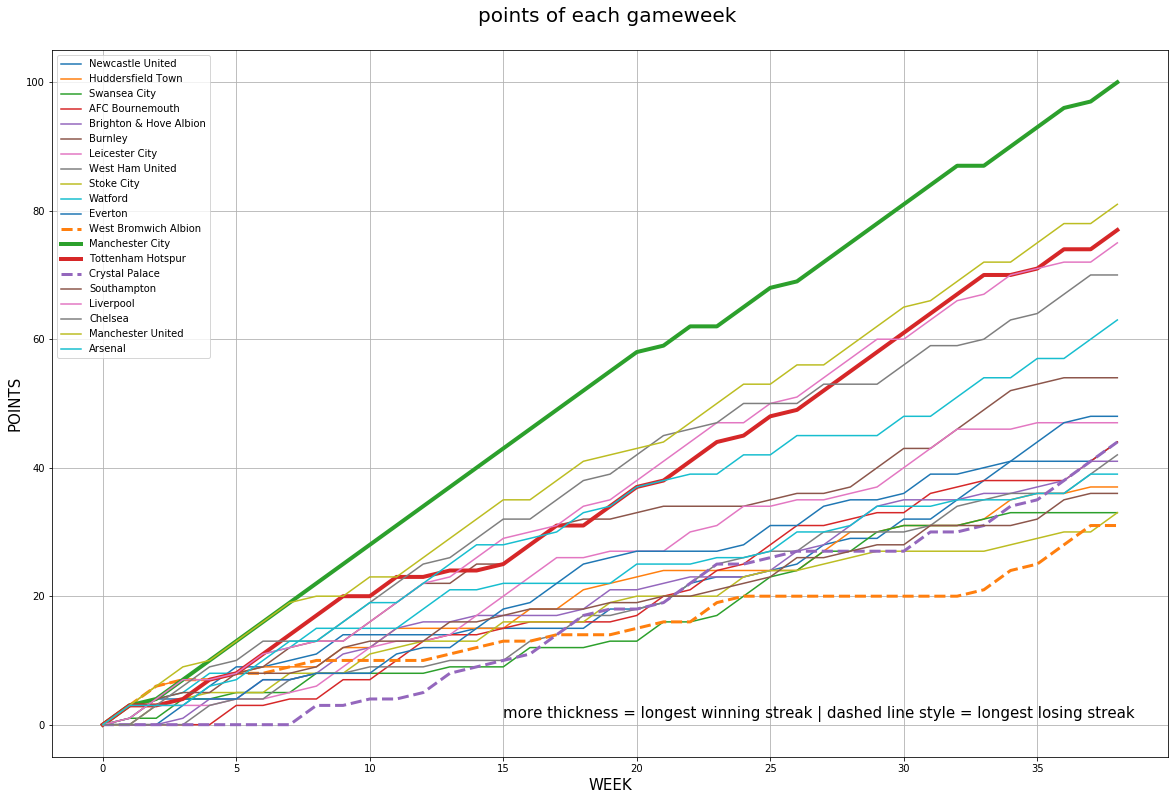

In [13]:
plt.figure(figsize=(20,13))
for index4 in range(len(points_teams)): 
    
    if teams.loc[index4, 'name'] in list_win:
        plt.plot(points_teams[teams.loc[index4, 'name']], linewidth=4 ,label = teams.loc[index4, 'name']) 
        
    elif teams.loc[index4, 'name'] in list_lose:
        plt.plot(points_teams[teams.loc[index4, 'name']],'--', linewidth=3, label = teams.loc[index4, 'name'])
    
    else:
        plt.plot(points_teams[teams.loc[index4, 'name']], label = teams.loc[index4, 'name']) 
        
plt.text(15, 1, 'more thickness = longest winning streak | dashed line style = longest losing streak', fontsize= 15)      
plt.xlabel('WEEK', fontsize = 15)  
plt.ylabel('POINTS', fontsize = 15)
plt.title('points of each gameweek \n', fontsize= 20)
plt.grid()
plt.legend()
plt.show() 

# BUNDESLIGA

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

teams = pd.read_json(r'C:\Users\simo2\teams.json')
england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\matches_Germany.json')

In [16]:
for i in range(len(teams)):
    
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)
        
    elif teams.loc[i, 'area']['name'] != 'Germany':
        teams = teams.drop(i)
        
teams = teams.reset_index(drop=True)   # reset indexes


points_teams = {}

for index1 in range(len(teams)):
    points_teams[teams.loc[index1, 'name']] = [0]
    
    for index2 in range(1,39): 
            
            for index3 in range(len(england)):
                if england.loc[index3, 'gameweek'] == index2:
                    
                    if ((teams.loc[index1, 'name'] in england.loc[index3, 'label']) == True):
                        if (england.loc[index3, 'winner'] == teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(3 + points_teams[teams.loc[index1, 'name']][index2 -1])
                            
                        elif (england.loc[index3, 'winner'] == 0):
                            points_teams[teams.loc[index1, 'name']].append(1 + points_teams[teams.loc[index1, 'name']][index2 -1])
                        
                        elif (england.loc[index3, 'winner'] != teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(points_teams[teams.loc[index1, 'name']][index2 -1])

teams

,area,city,name,officialName,type,wyId
0,"{'name': 'Germany', 'id': '276', 'alpha3code':...",M\u00f6nchengladbach,Borussia M'gladbach,Borussia VfL M\u00f6nchengladbach,club,2454
1,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Bremen,Werder Bremen,SV Werder Bremen,club,2443
2,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Leverkusen,Bayer Leverkusen,TSV Bayer 04 Leverkusen,club,2446
3,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Dortmund,Borussia Dortmund,BV Borussia 09 Dortmund,club,2447
4,"{'name': 'Germany', 'id': '276', 'alpha3code':...",M\u00fcnchen,Bayern M\u00fcnchen,FC Bayern M\u00fcnchen,club,2444
5,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Stuttgart,Stuttgart,VfB Stuttgart 1893,club,2445
6,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Gelsenkirchen,Schalke 04,FC Schalke 04,club,2449
7,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Hannover,Hannover 96,Hannover 96,club,2455
8,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Berlin,Hertha BSC,Hertha BSC,club,2457
9,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Wolfsburg,Wolfsburg,VfL Wolfsburg,club,2451


In [17]:
win_max = {}
lose_max = {}

for key, value in points_teams.items():
    win_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 3:
            count += 1
            if count > win_max[key]:
                win_max[key] = count
        else:
            count = 0
            
            
for key, value in points_teams.items():
    lose_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 0:
            count += 1
            if count > lose_max[key]:
                lose_max[key] = count
        else:
            count = 0

In [18]:
list_win = []
list_lose = []

key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)


del win_max[key_max1]
del lose_max[key_max2]


key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)

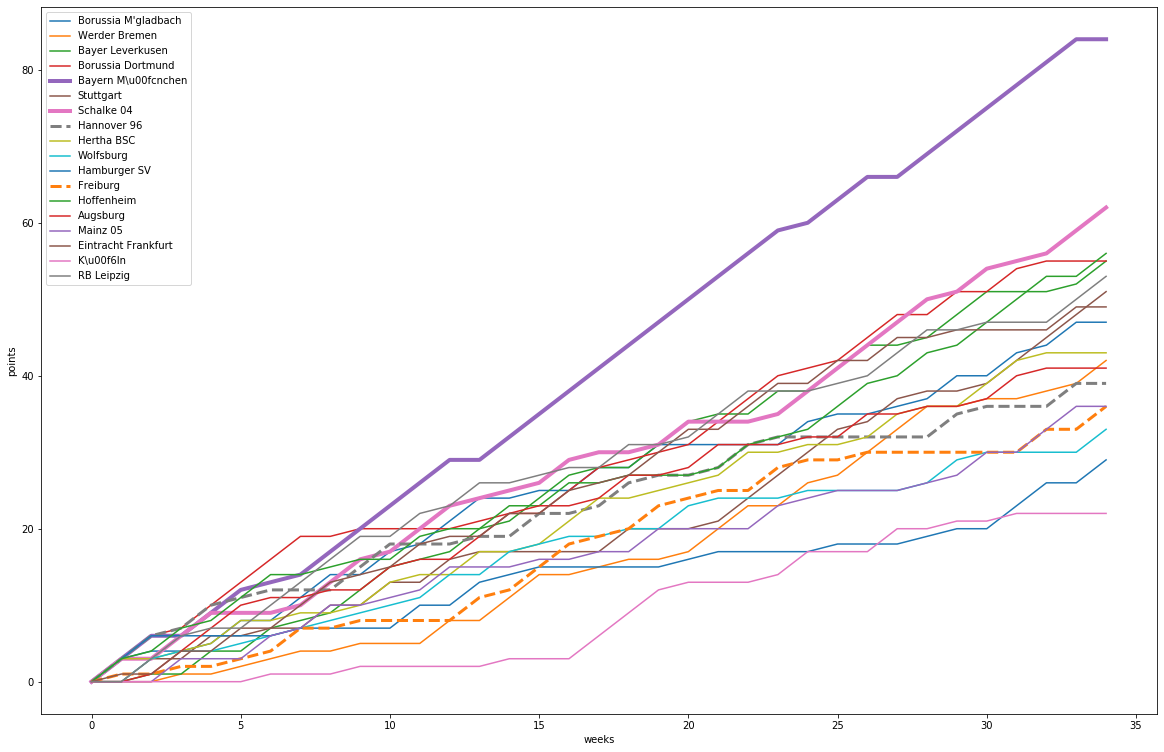

In [19]:
plt.figure(figsize=(20,13))
for index4 in range(len(points_teams)): 
    
    if teams.loc[index4, 'name'] in list_win:
        plt.plot(points_teams[teams.loc[index4, 'name']], linewidth=4 ,label = teams.loc[index4, 'name']) 
        
    elif teams.loc[index4, 'name'] in list_lose:
        plt.plot(points_teams[teams.loc[index4, 'name']],'--', linewidth=3, label = teams.loc[index4, 'name'])
    
    else:
        plt.plot(points_teams[teams.loc[index4, 'name']], label = teams.loc[index4, 'name']) 
        
plt.xlabel('weeks')  
plt.ylabel('points')
plt.legend()
plt.show() 

# LIGA

In [20]:
teams = pd.read_json(r'C:\Users\simo2\teams.json')
england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\matches_Spain.json')

In [21]:
for i in range(len(teams)):
    
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)
        
    elif teams.loc[i, 'area']['name'] != 'Spain':
        teams = teams.drop(i)
        
teams = teams.reset_index(drop=True)   # reset indexes


points_teams = {}

for index1 in range(len(teams)):
    points_teams[teams.loc[index1, 'name']] = [0]
    
    for index2 in range(1,39): 
            
            for index3 in range(len(england)):
                if england.loc[index3, 'gameweek'] == index2:
                    
                    if ((teams.loc[index1, 'name'] in england.loc[index3, 'label']) == True):
                        if (england.loc[index3, 'winner'] == teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(3 + points_teams[teams.loc[index1, 'name']][index2 -1])
                            
                        elif (england.loc[index3, 'winner'] == 0):
                            points_teams[teams.loc[index1, 'name']].append(1 + points_teams[teams.loc[index1, 'name']][index2 -1])
                        
                        elif (england.loc[index3, 'winner'] != teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(points_teams[teams.loc[index1, 'name']][index2 -1])

teams

,area,city,name,officialName,type,wyId
0,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Getafe (Madrid),Getafe,Getafe Club de F\u00fatbol,club,698
5,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Bilbao,Athletic Club,Athletic Club Bilbao,club,678
6,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Madrid,Atl\u00e9tico Madrid,Club Atl\u00e9tico de Madrid,club,679
7,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Valencia,Valencia Club de F\u00fatbol,club,674
8,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Madrid,Real Madrid,Real Madrid Club de F\u00fatbol,club,675
9,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Barcelona,FC Barcelona,club,676


In [22]:
win_max = {}
lose_max = {}

for key, value in points_teams.items():
    win_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 3:
            count += 1
            if count > win_max[key]:
                win_max[key] = count
        else:
            count = 0
            
            
for key, value in points_teams.items():
    lose_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 0:
            count += 1
            if count > lose_max[key]:
                lose_max[key] = count
        else:
            count = 0

In [23]:
list_win = []
list_lose = []

key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)


del win_max[key_max1]
del lose_max[key_max2]


key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)

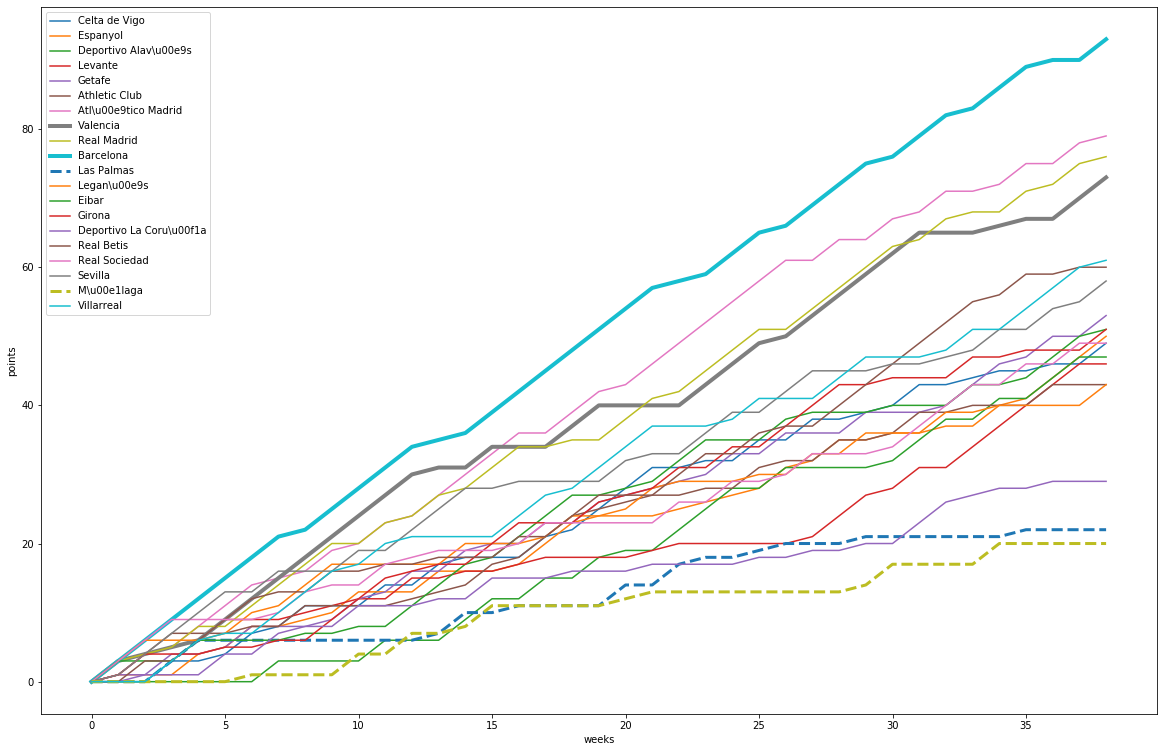

In [24]:
plt.figure(figsize=(20,13))
for index4 in range(len(points_teams)): 
    
    if teams.loc[index4, 'name'] in list_win:
        plt.plot(points_teams[teams.loc[index4, 'name']], linewidth=4 ,label = teams.loc[index4, 'name']) 
        
    elif teams.loc[index4, 'name'] in list_lose:
        plt.plot(points_teams[teams.loc[index4, 'name']],'--', linewidth=3, label = teams.loc[index4, 'name'])
    
    else:
        plt.plot(points_teams[teams.loc[index4, 'name']], label = teams.loc[index4, 'name']) 
        
plt.xlabel('weeks')  
plt.ylabel('points')
plt.legend()
plt.show() 

# Serie A

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

teams = pd.read_json(r'C:\Users\simo2\teams.json')
england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\matches_Italy.json')

In [3]:
for i in range(len(teams)):
    
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)
        
    elif teams.loc[i, 'area']['name'] != 'Italy':
        teams = teams.drop(i)
        
teams = teams.reset_index(drop=True)   # reset indexes


points_teams = {}

for index1 in range(len(teams)):
    points_teams[teams.loc[index1, 'name']] = [0]
    
    for index2 in range(1,39): 
            
            for index3 in range(len(england)):
                if england.loc[index3, 'gameweek'] == index2:
                    
                    if ((teams.loc[index1, 'name'] in england.loc[index3, 'label']) == True):
                        if (england.loc[index3, 'winner'] == teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(3 + points_teams[teams.loc[index1, 'name']][index2 -1])
                            
                        elif (england.loc[index3, 'winner'] == 0):
                            points_teams[teams.loc[index1, 'name']].append(1 + points_teams[teams.loc[index1, 'name']][index2 -1])
                        
                        elif (england.loc[index3, 'winner'] != teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(points_teams[teams.loc[index1, 'name']][index2 -1])

teams

,area,city,name,officialName,type,wyId
0,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Ferrara,SPAL,Societ\u00e0 Polisportiva Ars et Labor 2013,club,3204
1,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Milano,Milan,AC Milan,club,3157
2,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Torino,Juventus,Juventus FC,club,3159
3,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Roma,Roma,AS Roma,club,3158
4,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Sassuolo,Sassuolo,US Sassuolo Calcio,club,3315
5,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Bologna,Bologna,Bologna FC 1909,club,3166
6,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Genova,Sampdoria,UC Sampdoria,club,3164
7,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Verona,Chievo,AC Chievo Verona,club,3165
8,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Formello,Lazio,SS Lazio,club,3162
9,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Udine,Udinese,Udinese Calcio,club,3163


In [4]:
win_max = {}
lose_max = {}

for key, value in points_teams.items():
    win_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 3:
            count += 1
            if count > win_max[key]:
                win_max[key] = count
        else:
            count = 0
            
            
for key, value in points_teams.items():
    lose_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 0:
            count += 1
            if count > lose_max[key]:
                lose_max[key] = count
        else:
            count = 0

In [5]:
list_win = []
list_lose = []

key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)


del win_max[key_max1]
del lose_max[key_max2]


key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)

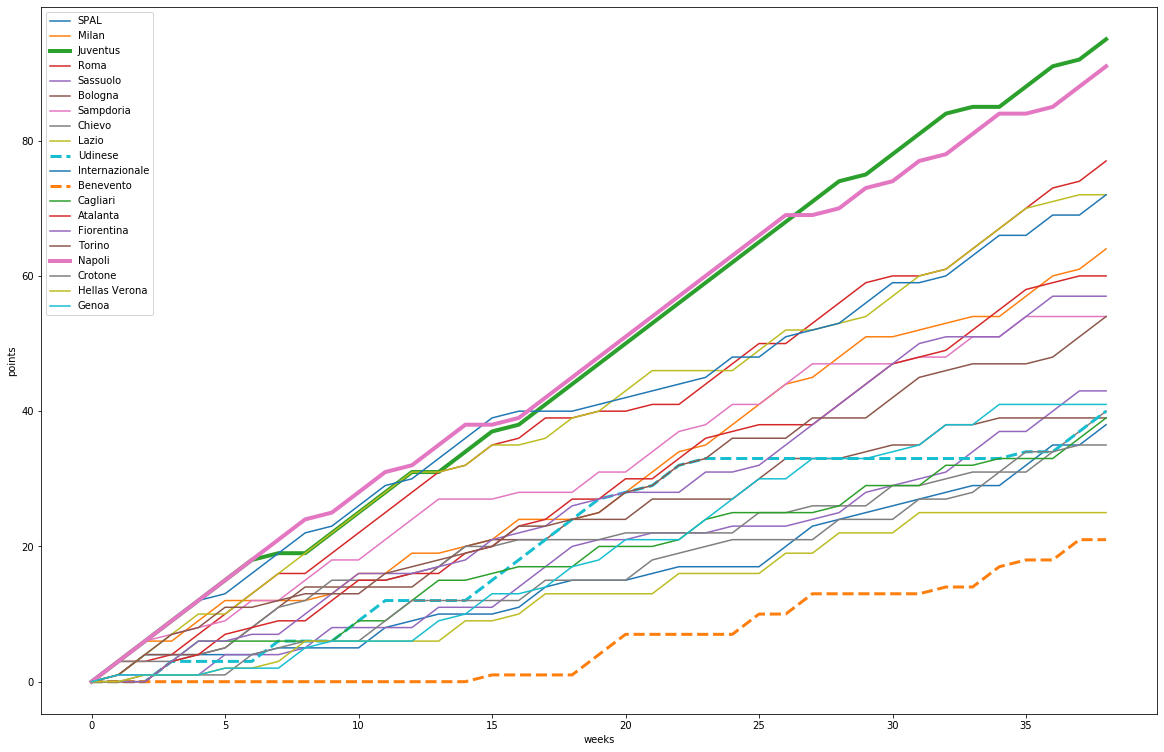

In [6]:
plt.figure(figsize=(20,13))
for index4 in range(len(points_teams)): 
    
    if teams.loc[index4, 'name'] in list_win:
        plt.plot(points_teams[teams.loc[index4, 'name']], linewidth=4 ,label = teams.loc[index4, 'name']) 
        
    elif teams.loc[index4, 'name'] in list_lose:
        plt.plot(points_teams[teams.loc[index4, 'name']],'--', linewidth=3, label = teams.loc[index4, 'name'])
    
    else:
        plt.plot(points_teams[teams.loc[index4, 'name']], label = teams.loc[index4, 'name']) 
        
plt.xlabel('weeks')  
plt.ylabel('points')
plt.legend()
plt.show() 

# Ligue 1

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

teams = pd.read_json(r'C:\Users\simo2\teams.json')
england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\matches_France.json')

In [8]:
for i in range(len(teams)):
    
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)
        
    elif teams.loc[i, 'area']['name'] != 'France' and teams.loc[i, 'area']['name'] != 'Monaco':
        teams = teams.drop(i)
        
teams = teams.reset_index(drop=True)   # reset indexes


points_teams = {}

for index1 in range(len(teams)):
    points_teams[teams.loc[index1, 'name']] = [0]
    
    for index2 in range(1,39): 
            
            for index3 in range(len(england)):
                if england.loc[index3, 'gameweek'] == index2:
                    
                    if ((teams.loc[index1, 'name'] in england.loc[index3, 'label']) == True):
                        if (england.loc[index3, 'winner'] == teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(3 + points_teams[teams.loc[index1, 'name']][index2 -1])
                            
                        elif (england.loc[index3, 'winner'] == 0):
                            points_teams[teams.loc[index1, 'name']].append(1 + points_teams[teams.loc[index1, 'name']][index2 -1])
                        
                        elif (england.loc[index3, 'winner'] != teams.loc[index1, 'wyId']):
                            points_teams[teams.loc[index1, 'name']].append(points_teams[teams.loc[index1, 'name']][index2 -1])

teams

,area,city,name,officialName,type,wyId
0,"{'name': 'France', 'id': '250', 'alpha3code': ...",Troyes,Troyes,Esp\u00e9rance Sportive Troyes Aube Champagne,club,3795
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",Lyon,Olympique Lyonnais,Olympique Lyonnais,club,3766
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",Paris,PSG,Paris Saint-Germain FC,club,3767
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",Marseille,Olympique Marseille,Olympique de Marseille,club,3771
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",La Chapelle-sur-Erdre,Nantes,FC Nantes,club,3770
5,"{'name': 'France', 'id': '250', 'alpha3code': ...",Nice,Nice,O.G.C. Nice C\u00f4te d'Azur,club,3775
6,"{'name': 'France', 'id': '250', 'alpha3code': ...",Rennes,Rennes,Stade Rennais FC,club,3774
7,"{'name': 'France', 'id': '250', 'alpha3code': ...",Strasbourg,Strasbourg,RC Strasbourg Alsace,club,3779
8,"{'name': 'France', 'id': '250', 'alpha3code': ...",Angers,Angers,Angers SCO,club,3799
9,"{'name': 'France', 'id': '250', 'alpha3code': ...",Le Haillan,Bordeaux,FC Girondins de Bordeaux,club,3772


In [9]:
win_max = {}
lose_max = {}

for key, value in points_teams.items():
    win_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 3:
            count += 1
            if count > win_max[key]:
                win_max[key] = count
        else:
            count = 0
            
            
for key, value in points_teams.items():
    lose_max[key] = 0
    count = 0
    for j in range(len(value)-1):
        if value[j+1] - value[j] == 0:
            count += 1
            if count > lose_max[key]:
                lose_max[key] = count
        else:
            count = 0

In [10]:
list_win = []
list_lose = []

key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)


del win_max[key_max1]
del lose_max[key_max2]


key_max1 = max(win_max.keys(), key=(lambda k: win_max[k]))
key_max2 = max(lose_max.keys(), key=(lambda k: lose_max[k]))
list_win.append(key_max1)
list_lose.append(key_max2)

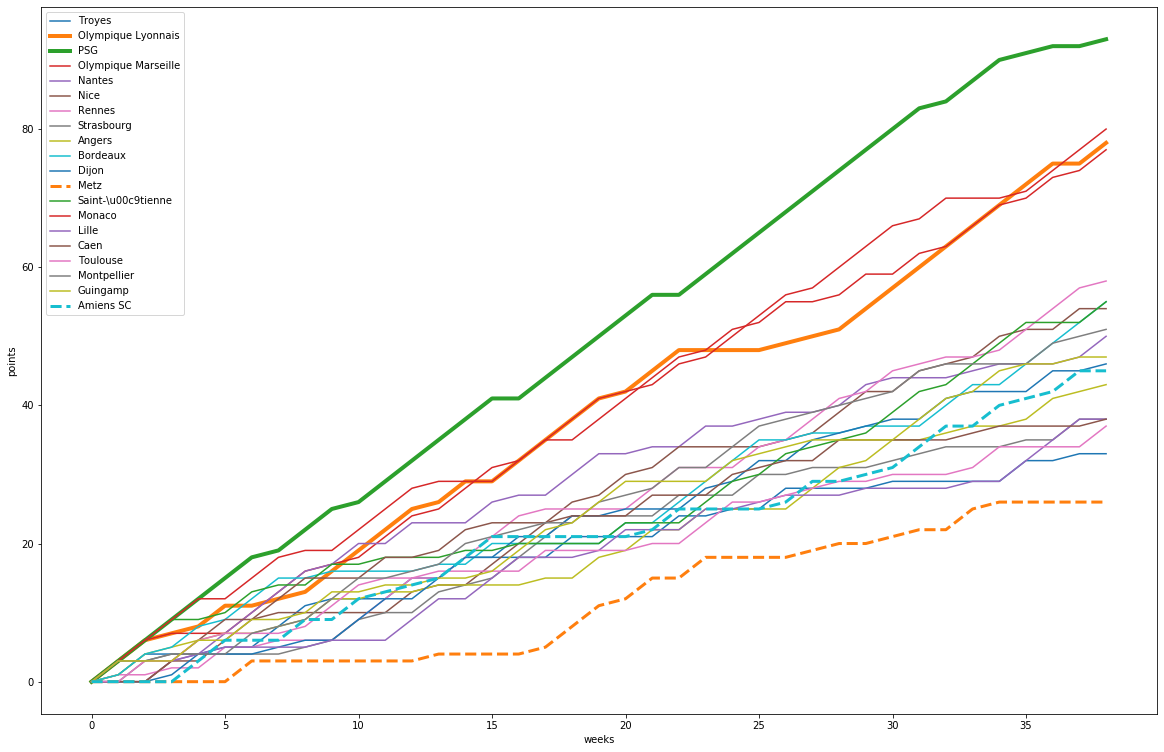

In [11]:
plt.figure(figsize=(20,13))
for index4 in range(len(points_teams)): 
    
    if teams.loc[index4, 'name'] in list_win:
        plt.plot(points_teams[teams.loc[index4, 'name']], linewidth=4 ,label = teams.loc[index4, 'name']) 
        
    elif teams.loc[index4, 'name'] in list_lose:
        plt.plot(points_teams[teams.loc[index4, 'name']],'--', linewidth=3, label = teams.loc[index4, 'name'])
    
    else:
        plt.plot(points_teams[teams.loc[index4, 'name']], label = teams.loc[index4, 'name']) 
        
plt.xlabel('weeks')  
plt.ylabel('points')
plt.legend()
plt.show() 

# RQ2

## Import and Clean Matches data

In [14]:
%reset
import pandas as pd
matches = pd.read_json(r"C:\Users\simo2\OneDrive\Desktop\progettiaris\matches_England.json")
matches = matches[["status", "gameweek", "winner", "label" ]] # fetch necessary columns
matches = matches[matches.status =="Played"] # be sure that all matches are played
del matches["status"] # we don't need status anymore
matches = matches.sort_values(by=["gameweek"]) #sort the rows according to game week
matches.index = range(len(matches.index)) #fix the indices
matches

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,gameweek,winner,label
0,1,1609,"Arsenal - Leicester City, 4 - 3"
1,1,1611,"Manchester United - West Ham United, 4 - 0"
2,1,1624,"Newcastle United - Tottenham Hotspur, 0 - 2"
3,1,1625,"Brighton & Hove Albion - Manchester City, 0 - 2"
4,1,1646,"Chelsea - Burnley, 2 - 3"
5,1,0,"Watford - Liverpool, 3 - 3"
6,1,1623,"Everton - Stoke City, 1 - 0"
7,1,0,"Southampton - Swansea City, 0 - 0"
8,1,1627,"West Bromwich Albion - AFC Bournemouth, 1 - 0"
9,1,1673,"Crystal Palace - Huddersfield Town, 0 - 3"


## Import and clean teams data

In [15]:
teams = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\teams.json')
teams = teams[teams.type =="club"] # we don't want national teams
teams = teams[["name", "area", "wyId"]] # we don't need the other colums
teams

,name,area,wyId
0,Newcastle United,"{'name': 'England', 'id': '0', 'alpha3code': '...",1613
1,Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",692
2,Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",691
3,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",696
4,Levante,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",695
5,Troyes,"{'name': 'France', 'id': '250', 'alpha3code': ...",3795
6,Getafe,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",698
7,Borussia M'gladbach,"{'name': 'Germany', 'id': '276', 'alpha3code':...",2454
8,Huddersfield Town,"{'name': 'England', 'id': '0', 'alpha3code': '...",1673
9,Athletic Club,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",678


## Create a DataFrame called premier league and add only the teams in England and Wales

In [16]:
premier_league = pd.DataFrame(columns=["name", "area", "wyId"])
for i in range(len(teams)):
    country = teams.iloc[i,:][1]["name"]
    if country == "England" or country == "Wales":
        premier_league = premier_league.append(teams.iloc[i,:])

premier_league.index = range(len(premier_league.index)) #fix the indices
del premier_league["area"] # we don't need area anymore
premier_league

,name,wyId
0,Newcastle United,1613
1,Huddersfield Town,1673
2,Swansea City,10531
3,AFC Bournemouth,1659
4,Brighton & Hove Albion,1651
5,Burnley,1646
6,Leicester City,1631
7,West Ham United,1633
8,Stoke City,1639
9,Watford,1644


### create new columns called home and away to split the label string

In [17]:
home = []
away = []
for i in range(len(matches)):
    string = matches.iloc[i,:][2]
    game = string.split(",")[0].split("-")
    home.append(game[0])
    away.append(game[1])
matches["home"] = home
matches["away"] = away
del matches["label"] # we don't need label anymore
matches

,gameweek,winner,home,away
0,1,1609,Arsenal,Leicester City
1,1,1611,Manchester United,West Ham United
2,1,1624,Newcastle United,Tottenham Hotspur
3,1,1625,Brighton & Hove Albion,Manchester City
4,1,1646,Chelsea,Burnley
5,1,0,Watford,Liverpool
6,1,1623,Everton,Stoke City
7,1,0,Southampton,Swansea City
8,1,1627,West Bromwich Albion,AFC Bournemouth
9,1,1673,Crystal Palace,Huddersfield Town


for each team in premier league, a 2D array should be created to perform the chi^2 test.
in this manner the 2*3 sized array rows would be home and away matches. On the other hand
the columns would be the number of  win, draw and loose respectively matches. The for loop bellow forms such
2D arrays for each team in premier league.

In [19]:
all_contingency_tables = []
for i in range(len(premier_league)):
    team = premier_league.iloc[i,0]
    wyıd = premier_league.iloc[i,1]
    home_games = matches[matches["home"] == team + " "]
    away_games = matches[matches["away"] == " " + team]

    home_wins = len(home_games[home_games.winner == wyıd])
    home_draws = len(home_games[home_games.winner == 0])
    home_loses = len(home_games[home_games.winner != wyıd]) - home_draws

    away_wins = len(away_games[away_games.winner == wyıd])
    away_draws = len(away_games[away_games.winner == 0])
    away_loses = len(away_games[away_games.winner != wyıd]) - away_draws

    all_contingency_tables.append([[home_wins, home_draws, home_loses],
                                   [away_wins, away_draws, away_loses]])

premier_league["contingency_tables"] = all_contingency_tables

premier_league

,name,wyId,contingency_tables
0,Newcastle United,1613,"[[8, 4, 7], [4, 4, 11]]"
1,Huddersfield Town,1673,"[[6, 5, 8], [3, 5, 11]]"
2,Swansea City,10531,"[[6, 3, 10], [2, 6, 11]]"
3,AFC Bournemouth,1659,"[[7, 5, 7], [4, 6, 9]]"
4,Brighton & Hove Albion,1651,"[[7, 8, 4], [2, 6, 11]]"
5,Burnley,1646,"[[7, 5, 7], [7, 7, 5]]"
6,Leicester City,1631,"[[7, 6, 6], [5, 5, 9]]"
7,West Ham United,1633,"[[7, 6, 6], [3, 6, 10]]"
8,Stoke City,1639,"[[5, 5, 9], [2, 7, 10]]"
9,Watford,1644,"[[6, 7, 6], [4, 2, 13]]"


# CHI^2 TEST 

For premier league teams, does the result of the match (win, draw or loose) depends on pitch (home or away)?

H0 = The result of the match dosn't depend on playing at home or away. The variables are independent.

The Chi^2 test is applied to all teams in Premier league and their p values are added to premier_league dataframe.


In [21]:
from scipy.stats import chi2_contingency
p_values =[]
for i in range(len(premier_league)):
    # contingency table
    table = all_contingency_tables[i]
    stat, p, dof, expected = chi2_contingency(table)
    p_values.append(p)

premier_league["P-Values"] = p_values

premier_league

,name,wyId,contingency_tables,P-Values
0,Newcastle United,1613,"[[8, 4, 7], [4, 4, 11]]",0.329193
1,Huddersfield Town,1673,"[[6, 5, 8], [3, 5, 11]]",0.478623
2,Swansea City,10531,"[[6, 3, 10], [2, 6, 11]]",0.217880
3,AFC Bournemouth,1659,"[[7, 5, 7], [4, 6, 9]]",0.560153
4,Brighton & Hove Albion,1651,"[[7, 8, 4], [2, 6, 11]]",0.042211
5,Burnley,1646,"[[7, 5, 7], [7, 7, 5]]",0.716531
6,Leicester City,1631,"[[7, 6, 6], [5, 5, 9]]",0.599223
7,West Ham United,1633,"[[7, 6, 6], [3, 6, 10]]",0.272532
8,Stoke City,1639,"[[5, 5, 9], [2, 7, 10]]",0.433510
9,Watford,1644,"[[6, 7, 6], [4, 2, 13]]",0.056227


In [22]:
# The teams having home field advantage when confidence interval is 95%
confidence95 = premier_league[premier_league["P-Values"] <= (1-0.95)]
confidence95

,name,wyId,contingency_tables,P-Values
4,Brighton & Hove Albion,1651,"[[7, 8, 4], [2, 6, 11]]",0.042211
19,Arsenal,1609,"[[15, 2, 2], [4, 4, 11]]",0.001316


In [23]:
# The teams having home field advantage when confidence interval is 90%
confidence90 = premier_league[premier_league["P-Values"] <= (1-0.90)]
confidence90

,name,wyId,contingency_tables,P-Values
4,Brighton & Hove Albion,1651,"[[7, 8, 4], [2, 6, 11]]",0.042211
9,Watford,1644,"[[6, 7, 6], [4, 2, 13]]",0.056227
16,Liverpool,1612,"[[12, 7, 0], [9, 5, 5]]",0.056081
19,Arsenal,1609,"[[15, 2, 2], [4, 4, 11]]",0.001316


In [24]:
# The teams having home field advantage when confidence interval is 80%
confidence80 = premier_league[premier_league["P-Values"] <= (1-0.80)]
confidence80

,name,wyId,contingency_tables,P-Values
4,Brighton & Hove Albion,1651,"[[7, 8, 4], [2, 6, 11]]",0.042211
9,Watford,1644,"[[6, 7, 6], [4, 2, 13]]",0.056227
10,Everton,1623,"[[9, 5, 5], [3, 7, 9]]",0.106661
11,West Bromwich Albion,1627,"[[3, 9, 7], [3, 4, 12]]",0.198011
16,Liverpool,1612,"[[12, 7, 0], [9, 5, 5]]",0.056081
19,Arsenal,1609,"[[15, 2, 2], [4, 4, 11]]",0.001316


Here we can claim that Arsenal is the team having the most Home field advantage. The performans of the Arsenal team really depends on playing home field. On the other hand, there is absolutely no home field advantage for Manchester City. They are already unbeatable so playing in home field or not doesn't effect their performance.
Now lets apply the chi^2 test to first 5 contingency tables to see if there is a home field advantage.

In [25]:
import numpy as np
total = np.zeros((2,3))
for i in all_contingency_tables[:5]:
    total=np.sum([i, total], axis=0)
stat, p, dof, expected = chi2_contingency(total)
total
print("stat = "+ str(stat), "p-value ="+ str(p))

stat = 10.691461026934542 p-value =0.004768466503684661


as seen when we increase the size of the data, the chi^2 test becomes more precise and returns lower p-values. Which shows that on there is home field advantage overall in premier league and the variables are dependent.

Finally, Lets apply chi^2 test to 5 random teams 50 times to see number of times the H0 is rejected for different cases.


In [27]:
fail =0
reject =0
import random
for k in range(50):
    random.seed(k)
    total = np.zeros((2,3))
    for i in np.random.choice(20, 5):
        total=np.sum([all_contingency_tables[i], total], axis=0)
    stat, p, dof, expected = chi2_contingency(total)
    print("stat = "+ str(stat), "p-value ="+ str(p))
    if p>(1-0.95):
        print("Fail to reject H0")
        fail+=1
    else:
        print("reject H0")
        reject+=1
print("reject = "+str(reject), "fail= "+str(fail))

stat = 8.745430375540046 p-value =0.012616936666181517
reject H0
stat = 2.1871679382296163 p-value =0.3350136609226889
Fail to reject H0
stat = 9.582172044822647 p-value =0.008303434767180897
reject H0
stat = 12.564848484848486 p-value =0.0018688645175206223
reject H0
stat = 3.1663574520717375 p-value =0.20532139931275373
Fail to reject H0
stat = 9.098007709474537 p-value =0.010577736099128196
reject H0
stat = 6.543730242360379 p-value =0.03793560654801582
reject H0
stat = 4.798863636363636 p-value =0.09076951222709259
Fail to reject H0
stat = 8.58279336956732 p-value =0.013685797197813192
reject H0
stat = 7.691426679907315 p-value =0.02137115122644177
reject H0
stat = 3.6618123257545587 p-value =0.1602682727954436
Fail to reject H0
stat = 3.5193675889328064 p-value =0.17209927396295857
Fail to reject H0
stat = 6.284848484848484 p-value =0.043177996989786575
reject H0
stat = 12.574426497648743 p-value =0.0018599359100289383
reject H0
stat = 9.530818260120586 p-value =0.0085194019858350

# [RQ3] Which teams have the youngest coaches?

##  Dataframe of coaches

In [29]:
%reset
#Convert coaches.json to Dataframe and clean it
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
coaches = pd.read_json(r'C:\Users\simo2\coaches.json')
clean_coaches = coaches.drop(['birthArea','lastName','middleName','firstName','currentTeamId','passportArea'], axis=1)
clean_coaches

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,birthDate,shortName,wyId
0,None,Cesar Domingo,275580
1,1945-05-09,J. Heynckes,14710
2,1956-06-16,G. De Biasi,135480
3,1965-08-14,Marcelino,210074
4,1974-04-02,T. Korkut,293398
5,1964-02-09,Ernesto Valverde,92894
6,1967-04-22,Unzué,3880
7,1967-12-29,D. Schuster,17121
8,1969-07-31,A. Conte,20454
9,1958-02-10,R. Gareca,86604


In [30]:
#Load the json matches dataset
with open(r'C:\Users\simo2\OneDrive\Desktop\matches_England.json') as json_data:
    json_matches = json.load(json_data)

## Creating a dictionary which has team-coaches pairs

In [31]:
#Store in a dictionary every coaches that team had in the season using teams as keys
dictionary_of_teams={}    
for i in range(len(json_matches)):
    list_keys=[*(json_matches[i]['teamsData'])]
    for key in list_keys:
        ID=json_matches[i]['teamsData'][key]['coachId']
        TEAM=json_matches[i]['teamsData'][key]['teamId']
        if TEAM not in dictionary_of_teams:
            dictionary_of_teams[TEAM]=[]
        if TEAM in dictionary_of_teams and ID not in dictionary_of_teams[TEAM] and ID != 0 :    
            dictionary_of_teams[TEAM].append(ID)
dictionary_of_teams            

{1646: [8880],
 1659: [8934],
 1628: [8357, 268775],
 1627: [7973, 9454, 149026],
 1609: [7845],
 1673: [18572],
 1651: [8093],
 1612: [14791],
 1644: [93112, 71037],
 1611: [3295],
 1613: [210700, 531745],
 1610: [272869, 20454],
 1625: [267136],
 1619: [9054, 254174],
 10531: [32573, 381291],
 1639: [8329, 9054],
 1631: [209010, 8214, 333782],
 1624: [3782, 292863],
 1623: [8541, 434992, 268779],
 1633: [8235, 269869]}

In [32]:
#Convert teams.json to Dataframe and clean it
teams_dataframe = pd.read_json(r'C:\Users\simo2\teams.json')
teams_dataframe = teams_dataframe.drop(["area", "city", "type","officialName"], axis=1)
teams_dataframe.rename(columns={'wyId':'teams'}, inplace=True)
teams_dataframe

,name,teams
0,Newcastle United,1613
1,Celta de Vigo,692
2,Espanyol,691
3,Deportivo Alav\u00e9s,696
4,Levante,695
5,Troyes,3795
6,Getafe,698
7,Borussia M'gladbach,2454
8,Huddersfield Town,1673
9,Athletic Club,678


## From the dictionary to a dataframe

In [33]:
#Convert the dictionary to a dataframe

coaches_teams_dataframe = pd.DataFrame([(key, var) for (key, L) in dictionary_of_teams.items() for var in L], 
                 columns=['teams', 'wyId'])  
coaches_teams_dataframe

,teams,wyId
0,1646,8880
1,1659,8934
2,1628,8357
3,1628,268775
4,1627,7973
5,1627,9454
6,1627,149026
7,1609,7845
8,1673,18572
9,1651,8093


## Merging dataframes

In [34]:
# Merge dataframes to obtain a final dataframe with coaches,coaches' birthdays and teams
mergedDataframe_coaches_teams = (pd.merge(coaches_teams_dataframe, clean_coaches, on='wyId'))
final_dataframe = (pd.merge(mergedDataframe_coaches_teams, teams_dataframe, on='teams'))
final_dataframe = final_dataframe.drop(['teams','wyId'],axis=1)

#Sort the dataset based on the birthDate columns and delete Antonio Conte row because he was two times in the dataset 

final_dataframe = final_dataframe.sort_values(by=['birthDate'], ascending=False) 
final_dataframe = final_dataframe.drop(16)#drop Conte
final_dataframe

,birthDate,shortName,name
1,1977-11-29,E. Howe,AFC Bournemouth
12,1977-07-12,Marco Silva,Watford
26,1975-12-04,M. Appleton,Leicester City
30,1973-10-16,D. Unsworth,Everton
15,1973-02-19,Paco,Newcastle United
28,1972-03-02,M. Pochettino,Tottenham Hotspur
24,1972-01-08,P. Clement,Swansea City
8,1971-10-19,D. Wagner,Huddersfield Town
20,1971-10-05,M. Pellegrino,Southampton
0,1971-06-28,S. Dyche,Burnley


## Eliminating duplicates

In [35]:
#Delete coaches that are from the same team and keeping only the youngest coach

clean_final_dataframe = final_dataframe.drop_duplicates(subset='name', keep='first')
clean_final_dataframe

,birthDate,shortName,name
1,1977-11-29,E. Howe,AFC Bournemouth
12,1977-07-12,Marco Silva,Watford
26,1975-12-04,M. Appleton,Leicester City
30,1973-10-16,D. Unsworth,Everton
15,1973-02-19,Paco,Newcastle United
28,1972-03-02,M. Pochettino,Tottenham Hotspur
24,1972-01-08,P. Clement,Swansea City
8,1971-10-19,D. Wagner,Huddersfield Town
20,1971-10-05,M. Pellegrino,Southampton
0,1971-06-28,S. Dyche,Burnley


## The 10 teams with the youngest coaches

In [36]:
#Print the 10 teams with the youngest coaches
print(clean_final_dataframe.name[:10].to_string(index=False))

   AFC Bournemouth
           Watford
    Leicester City
           Everton
  Newcastle United
 Tottenham Hotspur
      Swansea City
 Huddersfield Town
       Southampton
           Burnley


We want to define a function that converts Birthdates to Ages.

In [38]:
#Define a function that takes a birthDate and return the age

def convert_age(s):
    age =(pd.to_datetime('today').year-pd.to_datetime(s).year)
    return age

## BOXPLOT

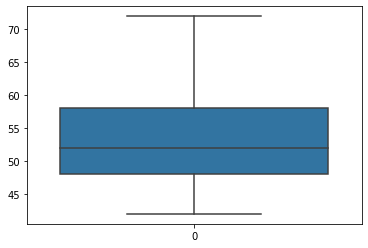

In [39]:
#Apply the function to every element of the column 'birthDate',rename the column and print the boxplot
final_dataframe['birthDate'] = final_dataframe['birthDate'].apply(convert_age)
final_dataframe.rename(columns={'birthDate': 'age'}, inplace=True)
sns.boxplot(data=final_dataframe['age'])


# RQ4

In [50]:
%reset
import pandas as pd   # importing pandas

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## premier league's teams

In [51]:
teams = pd.read_json(r'C:\Users\simo2\teams.json')

for i in range(len(teams)):    
# drop national team
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)         
# drop non premier's teams (swansea is in wales)
    elif teams.loc[i, 'area']['name'] != 'England' and teams.loc[i, 'area']['name'] != 'Wales':   
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)


## premier league's players

In [52]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')

teamsId = list(teams['wyId'])
# drop non premier league's players
for i in range(len(players)):  
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)


## number of ATTEMPTED passes for every players

In [53]:
events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\events_England.json')

events_england = events_england[events_england['eventName'] == 'Pass']  # only 'pass' events
events_england = events_england.reset_index(drop=True)

# creating a dict with keys(player), value(number of attempted passes)
pass_att = {} 

for index1 in range(len(players)):
    count = events_england[events_england['playerId'] == players.loc[index1, 'wyId']] # all attempted passes of one player
    
    pass_att[players.loc[index1, 'shortName']] = len(count) # value of that player = number of attempted passes

# removing the players who didn't reach a reasonably number of passes
 
l_key = [] # list of keys to remove

for key, value in pass_att.items():  
    if value < 150:
        l_key.append(key)
        
# removing keys from the dict (values < 150 passes) = players who didn't reach a reasonably number of passes
for j in l_key:  
    pass_att.pop(j)   


## new dataframe without meaningless events

In [54]:
# removing from events_england the players removed before

for i in range(len(players)):
    if players.loc[i, 'shortName'] not in pass_att.keys():
        players = players.drop(i)

players = players.reset_index(drop=True)

# creating a dataframe of events without events of removed players 

for i in range(len(players)):
    if events_england.loc[i, 'playerId'] not in players['wyId']:
        events_england = events_england.drop(i)

events_england = events_england.reset_index(drop=True)


## number of COMPLETED passes for every players

In [55]:
# creating a dataframe with only the completed passes

d = {'id': 1801}  #  tag 'completed pass'

# creating a new column('status') which says if the pass is completed or not
l_tags = events_england['tags'] 
status = []
for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no')
    else:
        status.append('completed')
        
# add the new column to events dataframe
events_england['status'] = status  

del events_england['tags']

# taking only the completed passes
com_pass = events_england[events_england['status'] == 'completed']


## percent of completed passes and first 10 most accurate players¶

In [56]:
# creating a dict with keys(player), value(number of completed passes)
pass_com = {} 

for index1 in range(len(players)):
    count1 = com_pass[com_pass['playerId'] == players.loc[index1, 'wyId']] # all completed passes of one player
    
    pass_com[players.loc[index1, 'shortName']] = len(count1) # value of that player = number of completed passes

# creating a dict with completed/attempted

for key, value in pass_com.items():
    
# change the values of pass_att with the ratio of completed / attempted
    pass_att[key] = (pass_com[key]/pass_att[key])*100  

pass_ratio = pass_att 

pass_ratio = sorted(pass_ratio.items(), key=lambda x: x[1], reverse=True) # sorting by value

print(pass_ratio[:10]) # print the 10 most accurate playera


[('J. Stones', 97.59136212624585), ('F. Delph', 94.50757575757575), ('V. Kompany', 94.32063263838964), ('A. Christensen', 94.02173913043478), ('P. Jones', 93.85052034058657), ('N. Otamendi', 93.75843454790824), ('\\u0130. G\\u00fcndo\\u011fan', 93.55555555555556), ('V. Lindel\\u00f6f', 93.55281207133059), ('M. Demb\\u00e9l\\u00e9', 93.26007326007326), ('Ederson', 93.24487334137515)]


# BUNDESLIGA

In [57]:
import pandas as pd 

teams = pd.read_json(r'C:\Users\simo2\teams.json')

for i in range(len(teams)):    
# drop national team
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)         
# drop non premier's teams (swansea is in wales)
    elif teams.loc[i, 'area']['name'] != 'Germany':   
        teams = teams.drop(i)
teams = teams.reset_index(drop=True)
teams

,area,city,name,officialName,type,wyId
0,"{'name': 'Germany', 'id': '276', 'alpha3code':...",M\u00f6nchengladbach,Borussia M'gladbach,Borussia VfL M\u00f6nchengladbach,club,2454
1,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Bremen,Werder Bremen,SV Werder Bremen,club,2443
2,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Leverkusen,Bayer Leverkusen,TSV Bayer 04 Leverkusen,club,2446
3,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Dortmund,Borussia Dortmund,BV Borussia 09 Dortmund,club,2447
4,"{'name': 'Germany', 'id': '276', 'alpha3code':...",M\u00fcnchen,Bayern M\u00fcnchen,FC Bayern M\u00fcnchen,club,2444
5,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Stuttgart,Stuttgart,VfB Stuttgart 1893,club,2445
6,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Gelsenkirchen,Schalke 04,FC Schalke 04,club,2449
7,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Hannover,Hannover 96,Hannover 96,club,2455
8,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Berlin,Hertha BSC,Hertha BSC,club,2457
9,"{'name': 'Germany', 'id': '276', 'alpha3code':...",Wolfsburg,Wolfsburg,VfL Wolfsburg,club,2451


In [58]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')

teamsId = list(teams['wyId'])
# drop non premier league's players
for i in range(len(players)):  
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)
players

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247
1,"{'name': 'Austria', 'id': '40', 'alpha3code': ...",1994-03-17,null,2975,Marcel,right,177,Sabitzer,,"{'name': 'Austria', 'id': '40', 'alpha3code': ...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",M. Sabitzer,74,65596
2,"{'name': 'Finland', 'id': '246', 'alpha3code':...",1985-09-29,4849,2443,Niklas,left,183,Moisander,,"{'name': 'Finland', 'id': '246', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",N. Moisander,75,77
3,"{'name': 'Cura\u00e7ao', 'id': '531', 'alpha3c...",1989-08-21,18138,2455,Charlison,right,191,Benschop,,"{'name': 'Cura\u00e7ao', 'id': '531', 'alpha3c...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",C. Benschop,91,91
4,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1994-03-30,null,2462,Jetro,left,169,Willems,,"{'name': 'Cura\u00e7ao', 'id': '531', 'alpha3c...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Willems,65,110
5,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1991-07-10,null,2481,Jeffrey,right,188,Gouweleeuw,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Gouweleeuw,78,159
6,"{'name': 'Slovakia', 'id': '703', 'alpha3code'...",1986-10-30,14496,2457,Peter,right,176,Pekar\u00edk,,"{'name': 'Slovakia', 'id': '703', 'alpha3code'...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",P. Pekar\u00edk,70,32959
7,"{'name': 'Switzerland', 'id': '756', 'alpha3co...",1997-12-06,null,2482,Gregor,right,194,Kobel,,"{'name': 'Switzerland', 'id': '756', 'alpha3co...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",G. Kobel,90,328190
8,"{'name': 'Switzerland', 'id': '756', 'alpha3co...",1996-11-20,6697,2454,Denis Lemi,right,191,Zakaria Lako Lado,,"{'name': 'Congo DR', 'id': '180', 'alpha3code'...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",D. Zakaria,80,360992
9,"{'name': 'Morocco', 'id': '504', 'alpha3code':...",1997-10-21,16216,2449,Hamza,left,179,Mendyl,,"{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",H. Mendyl,73,426702


In [62]:
events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_Germany.json')

events_england = events_england[events_england['eventName'] == 'Pass']  # only 'pass' events
events_england = events_england.reset_index(drop=True)
events_england

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.409746,179896442,2516739,1H,15231,"[{'y': 50, 'x': 50}, {'y': 48, 'x': 50}]",85,Simple pass,[{'id': 1801}],2446
1,8,Pass,2.506082,179896443,2516739,1H,14786,"[{'y': 48, 'x': 50}, {'y': 22, 'x': 22}]",85,Simple pass,[{'id': 1801}],2446
2,8,Pass,6.946706,179896444,2516739,1H,14803,"[{'y': 22, 'x': 22}, {'y': 46, 'x': 6}]",85,Simple pass,[{'id': 1801}],2446
3,8,Pass,10.786491,179896445,2516739,1H,14768,"[{'y': 46, 'x': 6}, {'y': 10, 'x': 20}]",85,Simple pass,[{'id': 1801}],2446
4,8,Pass,12.684514,179896446,2516739,1H,14803,"[{'y': 10, 'x': 20}, {'y': 4, 'x': 27}]",85,Simple pass,[{'id': 1801}],2446
5,8,Pass,15.530516,179896447,2516739,1H,40657,"[{'y': 4, 'x': 27}, {'y': 1, 'x': 18}]",85,Simple pass,[{'id': 1801}],2446
6,8,Pass,17.507003,179896448,2516739,1H,14803,"[{'y': 1, 'x': 18}, {'y': 1, 'x': 28}]",85,Simple pass,[{'id': 1801}],2446
7,8,Pass,18.404516,179896449,2516739,1H,40657,"[{'y': 1, 'x': 28}, {'y': 20, 'x': 30}]",85,Simple pass,[{'id': 1802}],2446
8,8,Pass,19.312823,179896458,2516739,1H,15811,"[{'y': 80, 'x': 70}, {'y': 91, 'x': 70}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",2444
9,8,Pass,20.551997,179896460,2516739,1H,14732,"[{'y': 91, 'x': 70}, {'y': 81, 'x': 76}]",85,Simple pass,[{'id': 1801}],2444


In [63]:
# creating a dict with keys(player), value(number of attempted passes)
pass_att = {} 

for index1 in range(len(players)):
    count = events_england[events_england['playerId'] == players.loc[index1, 'wyId']] # all attempted passes of one player
    
    pass_att[players.loc[index1, 'shortName']] = len(count) # value of that player = number of attempted passes

pass_att

{'I. Konat\\u00e9': 606,
 'M. Sabitzer': 829,
 'N. Moisander': 1416,
 'C. Benschop': 52,
 'J. Willems': 576,
 'J. Gouweleeuw': 1098,
 'P. Pekar\\u00edk': 603,
 'G. Kobel': 0,
 'D. Zakaria': 955,
 'H. Mendyl': 0,
 'M. Kami\\u0144ski': 794,
 'K. Onisiwo': 63,
 'P. Olkowski': 119,
 'J. Klinsmann': 0,
 'E. Berggreen': 124,
 'Bernardo': 682,
 'R. Gikiewicz': 40,
 'N. Amiri': 809,
 'D. Kohr': 886,
 'R. Bazoer': 236,
 'K. Coman': 583,
 'J. Pohjanpalo': 13,
 'M. Akanji': 580,
 'J. Villalba': 3,
 'A. Hakimi': 0,
 'Juan Bernat': 479,
 'N. S\\u00fcle': 1557,
 'N. \\u015eahin': 1013,
 'Thiago Alc\\u00e2ntara': 1244,
 'Javi Mart\\u00ednez': 1113,
 'J. de Guzm\\u00e1n': 562,
 'Camacho': 455,
 'D. Origi': 363,
 'A. Kramari\\u0107': 812,
 'A. Rebi\\u0107': 445,
 'Zhang Yuning': 0,
 'Omar Mascarell': 449,
 'A. Donis': 196,
 'J. Rodr\\u00edguez': 1446,
 'A. Witsel': 0,
 'E. Ins\\u00faa': 836,
 'J. Elez': 348,
 'M. Meyer': 1016,
 'M. Ga\\u0107inovi\\u0107': 597,
 'R. van Drongelen': 614,
 'A. Finnbogason

In [64]:
# removing the players who didn't reach a reasonably number of passes
 
l_key = [] # list of keys to remove

for key, value in pass_att.items():  
    if value < 150:
        l_key.append(key)
        
# removing keys from the dict (values < 150 passes) = players who didn't reach a reasonably number of passes
for j in l_key:  
    pass_att.pop(j) 

pass_att

{'I. Konat\\u00e9': 606,
 'M. Sabitzer': 829,
 'N. Moisander': 1416,
 'J. Willems': 576,
 'J. Gouweleeuw': 1098,
 'P. Pekar\\u00edk': 603,
 'D. Zakaria': 955,
 'M. Kami\\u0144ski': 794,
 'Bernardo': 682,
 'N. Amiri': 809,
 'D. Kohr': 886,
 'R. Bazoer': 236,
 'K. Coman': 583,
 'M. Akanji': 580,
 'Juan Bernat': 479,
 'N. S\\u00fcle': 1557,
 'N. \\u015eahin': 1013,
 'Thiago Alc\\u00e2ntara': 1244,
 'Javi Mart\\u00ednez': 1113,
 'J. de Guzm\\u00e1n': 562,
 'Camacho': 455,
 'D. Origi': 363,
 'A. Kramari\\u0107': 812,
 'A. Rebi\\u0107': 445,
 'Omar Mascarell': 449,
 'A. Donis': 196,
 'J. Rodr\\u00edguez': 1446,
 'E. Ins\\u00faa': 836,
 'J. Elez': 348,
 'M. Meyer': 1016,
 'M. Ga\\u0107inovi\\u0107': 597,
 'R. van Drongelen': 614,
 'A. Finnbogason': 402,
 'D. Opare': 442,
 'Felipe': 252,
 'I. Bebou': 581,
 'Bruma': 785,
 'K. Danso': 483,
 'K. Laimer': 604,
 'A. Diallo': 1047,
 'T. Baumgartl': 1382,
 'T. Kehrer': 1184,
 'Y. Konoplyanka': 445,
 'N. Elvedi': 1442,
 'D. Geiger': 770,
 'A. Mehmedi'

In [65]:
# removing from events_england the players removed before

for i in range(len(players)):
    if players.loc[i, 'shortName'] not in pass_att.keys():
        players = players.drop(i)

players = players.reset_index(drop=True)

# creating a dataframe of events without events of removed players 

for i in range(len(players)):
    if events_england.loc[i, 'playerId'] not in players['wyId']:
        events_england = events_england.drop(i)

events_england = events_england.reset_index(drop=True)


In [66]:
# creating a dataframe with only the completed passes

d = {'id': 1801}  #  tag 'completed pass'

# creating a new column('status') which says if the pass is completed or not
l_tags = events_england['tags'] 
status = []
for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no')
    else:
        status.append('completed')
        
# add the new column to events dataframe
events_england['status'] = status  

del events_england['tags']

# taking only the completed passes
com_pass = events_england[events_england['status'] == 'completed']

In [67]:
# creating a dict with keys(player), value(number of completed passes)
pass_com = {} 

for index1 in range(len(players)):
    count1 = com_pass[com_pass['playerId'] == players.loc[index1, 'wyId']] # all completed passes of one player
    
    pass_com[players.loc[index1, 'shortName']] = len(count1) # value of that player = number of completed passes

# creating a dict with completed/attempted

for key, value in pass_com.items():
    
# change the values of pass_att with the ratio of completed / attempted
    pass_att[key] = (pass_com[key]/pass_att[key])*100  

pass_ratio = pass_att 

pass_ratio = sorted(pass_ratio.items(), key=lambda x: x[1], reverse=True) # sorting by value

print(pass_ratio[:10]) # print the 10 most accurate players

[('Thiago Alc\\u00e2ntara', 92.84565916398714), ('D. Zakaria', 92.14659685863874), ('\\u00d6. Toprak', 92.09006928406467), ('J. Baumgartlinger', 91.99110122358177), ('N. S\\u00fcle', 91.77906229929351), ('Javi Mart\\u00ednez', 91.7340521114106), ('Juan Bernat', 91.44050104384134), ('M. Meyer', 91.04330708661418), ('J. Bruma', 90.92465753424658), ('K. Vogt', 90.72941176470589)]


# SERIE A

In [82]:
%reset
import pandas as pd 

teams = pd.read_json(r'C:\Users\simo2\teams.json')

for i in range(len(teams)):    
# drop national team
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)         
# drop non premier's teams (swansea is in wales)
    elif teams.loc[i, 'area']['name'] != 'Italy':   
        teams = teams.drop(i)
teams = teams.reset_index(drop=True)
teams

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


,area,city,name,officialName,type,wyId
0,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Ferrara,SPAL,Societ\u00e0 Polisportiva Ars et Labor 2013,club,3204
1,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Milano,Milan,AC Milan,club,3157
2,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Torino,Juventus,Juventus FC,club,3159
3,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Roma,Roma,AS Roma,club,3158
4,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Sassuolo,Sassuolo,US Sassuolo Calcio,club,3315
5,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Bologna,Bologna,Bologna FC 1909,club,3166
6,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Genova,Sampdoria,UC Sampdoria,club,3164
7,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Verona,Chievo,AC Chievo Verona,club,3165
8,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Formello,Lazio,SS Lazio,club,3162
9,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",Udine,Udinese,Udinese Calcio,club,3163


In [83]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')

teamsId = list(teams['wyId'])
# drop non premier league's players
for i in range(len(players)):  
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)
players

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Iraq', 'id': '368', 'alpha3code': 'I...",1993-12-19,17759,3163,Ali Adnan Kadhim,left,186,Al Tameemi,,"{'name': 'Iraq', 'id': '368', 'alpha3code': 'I...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",Ali Adnan,78,131184
1,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1990-02-13,null,3158,Kevin,left,186,Strootman,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",K. Strootman,78,114
2,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...",1987-05-06,5629,3187,Dries,right,169,Mertens,,"{'name': 'Belgium', 'id': '56', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",D. Mertens,61,122
3,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1992-02-05,null,3162,Stefan,right,189,de Vrij,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",S. de Vrij,78,130
4,"{'name': 'Serbia', 'id': '688', 'alpha3code': ...",1992-01-30,null,3219,Filip,right,181,\u0110uri\u010di\u0107,,"{'name': 'Serbia', 'id': '688', 'alpha3code': ...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",F. \u0110uri\u010di\u0107,72,174
5,"{'name': 'Serbia', 'id': '688', 'alpha3code': ...",1988-06-10,null,3194,Jago\u0161,left,195,Vukovi\u0107,,"{'name': 'Serbia', 'id': '688', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",J. Vukovi\u0107,93,192
6,"{'name': 'Germany', 'id': '276', 'alpha3code':...",1994-06-05,null,3172,Robin,left,183,Gosens,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",R. Gosens,76,295176
7,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",1999-01-04,null,3163,Davide,left,180,Borsellini,,"{'name': 'Italy', 'id': '380', 'alpha3code': '...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",D. Borsellini,69,393566
8,"{'name': 'Ghana', 'id': '288', 'alpha3code': '...",1996-06-07,17527,3166,Godfred,right,175,Donsah,,"{'name': 'Ghana', 'id': '288', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",G. Donsah,70,295273
9,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1990-05-04,null,3163,Bram,left,190,Nuytinck,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",B. Nuytinck,80,394


In [84]:
events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_Italy.json')

events_england = events_england[events_england['eventName'] == 'Pass']  # only 'pass' events
events_england = events_england.reset_index(drop=True)
events_england

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.530536,180423957,2575959,1H,8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",85,Simple pass,[{'id': 1801}],3158
1,8,Pass,3.768418,180423958,2575959,1H,20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",85,Simple pass,[{'id': 1801}],3158
2,8,Pass,10.376066,180423962,2575959,1H,8306,"[{'y': 15, 'x': 72}, {'y': 25, 'x': 72}]",85,Simple pass,[{'id': 1801}],3158
3,8,Pass,16.240563,180423979,2575959,1H,86366,"[{'y': 82, 'x': 38}, {'y': 88, 'x': 43}]",85,Simple pass,[{'id': 1801}],3172
4,8,Pass,19.153235,180423968,2575959,1H,8306,"[{'y': 15, 'x': 61}, {'y': 15, 'x': 37}]",85,Simple pass,[{'id': 1801}],3158
5,8,Pass,20.873026,180423969,2575959,1H,20518,"[{'y': 15, 'x': 37}, {'y': 30, 'x': 41}]",85,Simple pass,[{'id': 1801}],3158
6,8,Pass,21.503835,180423970,2575959,1H,20438,"[{'y': 30, 'x': 41}, {'y': 16, 'x': 34}]",85,Simple pass,[{'id': 1801}],3158
7,8,Pass,23.201103,180423971,2575959,1H,20518,"[{'y': 16, 'x': 34}, {'y': 10, 'x': 51}]",85,Simple pass,[{'id': 1801}],3158
8,8,Pass,27.700356,180423973,2575959,1H,8306,"[{'y': 13, 'x': 65}, {'y': 29, 'x': 71}]",85,Simple pass,[{'id': 1801}],3158
9,8,Pass,57.313039,180423981,2575959,1H,3475,"[{'y': 13, 'x': 89}, {'y': 83, 'x': 100}]",80,Cross,"[{'id': 402}, {'id': 801}, {'id': 1802}]",3158


In [85]:
# creating a dict with keys(player), value(number of attempted passes)
pass_att = {} 

for index1 in range(len(players)):
    count = events_england[events_england['playerId'] == players.loc[index1, 'wyId']] # all attempted passes of one player
    
    pass_att[players.loc[index1, 'shortName']] = len(count) # value of that player = number of attempted passes

pass_att

{'Ali Adnan': 639,
 'K. Strootman': 1392,
 'D. Mertens': 973,
 'S. de Vrij': 1507,
 'F. \\u0110uri\\u010di\\u0107': 369,
 'J. Vukovi\\u0107': 509,
 'R. Gosens': 744,
 'D. Borsellini': 0,
 'G. Donsah': 617,
 'B. Nuytinck': 1177,
 'M. de Roon': 1589,
 'L. Pellegrini': 930,
 'M. Fares': 981,
 '\\u0141. Skorupski': 23,
 'A. Milik': 133,
 'G. Pegolo': 21,
 'M. St\\u0119pi\\u0144ski': 131,
 'F. Vicari': 1140,
 'A. Ferrari': 842,
 'C. Keita': 27,
 'T. Cionek': 711,
 'R. Bentancur': 503,
 'A. Deiola': 144,
 'B. Bereszy\\u0144ski': 1268,
 'P. Zieli\\u0144ski': 1263,
 'T. Castagne': 818,
 'P. Gollini': 128,
 'E. Bearzotti': 152,
 'E. Viviano': 503,
 'T. Strakosha': 764,
 'V. Laurini': 846,
 'A. Bar\\u00e1k': 1112,
 'Dalbert': 295,
 'Jos\\u00e9 Callej\\u00f3n': 1476,
 'S. Khedira': 923,
 'Cristiano Ronaldo': 0,
 'G. Higua\\u00edn': 681,
 'F. Caicedo': 159,
 'A. Cragno': 411,
 'Rafinha': 724,
 'F. Costa': 552,
 'D. Rugani': 1470,
 'L. Capezzi': 125,
 'A. Grassi': 736,
 'S. Fofana': 892,
 'C. Ansal

In [86]:
# removing the players who didn't reach a reasonably number of passes
 
l_key = [] # list of keys to remove

for key, value in pass_att.items():  
    if value < 150:
        l_key.append(key)
        
# removing keys from the dict (values < 150 passes) = players who didn't reach a reasonably number of passes
for j in l_key:  
    pass_att.pop(j) 

pass_att

{'Ali Adnan': 639,
 'K. Strootman': 1392,
 'D. Mertens': 973,
 'S. de Vrij': 1507,
 'F. \\u0110uri\\u010di\\u0107': 369,
 'J. Vukovi\\u0107': 509,
 'R. Gosens': 744,
 'G. Donsah': 617,
 'B. Nuytinck': 1177,
 'M. de Roon': 1589,
 'L. Pellegrini': 930,
 'M. Fares': 981,
 'F. Vicari': 1140,
 'A. Ferrari': 842,
 'T. Cionek': 711,
 'R. Bentancur': 503,
 'B. Bereszy\\u0144ski': 1268,
 'P. Zieli\\u0144ski': 1263,
 'T. Castagne': 818,
 'E. Bearzotti': 152,
 'E. Viviano': 503,
 'T. Strakosha': 764,
 'V. Laurini': 846,
 'A. Bar\\u00e1k': 1112,
 'Dalbert': 295,
 'Jos\\u00e9 Callej\\u00f3n': 1476,
 'S. Khedira': 923,
 'G. Higua\\u00edn': 681,
 'F. Caicedo': 159,
 'A. Cragno': 411,
 'Rafinha': 724,
 'F. Costa': 552,
 'D. Rugani': 1470,
 'A. Grassi': 736,
 'S. Fofana': 892,
 'C. Ansaldi': 774,
 'F. Fazio': 1828,
 'D. Perotti': 832,
 'Luis Alberto': 1527,
 'M. Musacchio': 916,
 'C. Zapata': 640,
 'K. Babacar': 221,
 'S. Milinkovi\\u0107-Savi\\u0107': 1671,
 'F. Zuculini': 160,
 'M. Badelj': 1686,
 'A

In [87]:
# removing from events_england the players removed before

for i in range(len(players)):
    if players.loc[i, 'shortName'] not in pass_att.keys():
        players = players.drop(i)

players = players.reset_index(drop=True)

# creating a dataframe of events without events of removed players 

for i in range(len(players)):
    if events_england.loc[i, 'playerId'] not in players['wyId']:
        events_england = events_england.drop(i)

events_england = events_england.reset_index(drop=True)


In [88]:
# creating a dataframe with only the completed passes

d = {'id': 1801}  #  tag 'completed pass'

# creating a new column('status') which says if the pass is completed or not
l_tags = events_england['tags'] 
status = []
for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no')
    else:
        status.append('completed')
        
# add the new column to events dataframe
events_england['status'] = status  

del events_england['tags']

# taking only the completed passes
com_pass = events_england[events_england['status'] == 'completed']

In [89]:
# creating a dict with keys(player), value(number of completed passes)
pass_com = {} 

for index1 in range(len(players)):
    count1 = com_pass[com_pass['playerId'] == players.loc[index1, 'wyId']] # all completed passes of one player
    
    pass_com[players.loc[index1, 'shortName']] = len(count1) # value of that player = number of completed passes

# creating a dict with completed/attempted

for key, value in pass_com.items():
    
# change the values of pass_att with the ratio of completed / attempted
    pass_att[key] = (pass_com[key]/pass_att[key])*100  

pass_ratio = pass_att 

pass_ratio = sorted(pass_ratio.items(), key=lambda x: x[1], reverse=True) # sorting by value

print(pass_ratio[:10]) # print the 10 most accurate players

[('L. Tonelli', 96.19047619047619), ('A. Diawara', 93.96551724137932), ('A. Barzagli', 93.89830508474576), ('D. Rugani', 93.46938775510203), ('M. Benatia', 93.27354260089686), ('A. Danzi', 93.01075268817203), ('V. Chiriche\\u0219', 92.84403669724772), ('B. H\\u00f6wedes', 92.78846153846155), ('S. de Vrij', 92.76708692767087), ('S. Handanovi\\u010d', 92.5925925925926)]


# LIGA

In [1]:
import pandas as pd 

teams = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\teams.json')

for i in range(len(teams)):    
# drop national team
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)         
# drop non premier's teams (swansea is in wales)
    elif teams.loc[i, 'area']['name'] != 'Spain':   
        teams = teams.drop(i)
teams = teams.reset_index(drop=True)
teams



,area,city,name,officialName,type,wyId
0,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vigo,Celta de Vigo,Real Club Celta de Vigo,club,692
1,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Espanyol,Reial Club Deportiu Espanyol,club,691
2,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,club,696
3,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Levante,Levante UD,club,695
4,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Getafe (Madrid),Getafe,Getafe Club de F\u00fatbol,club,698
5,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Bilbao,Athletic Club,Athletic Club Bilbao,club,678
6,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Madrid,Atl\u00e9tico Madrid,Club Atl\u00e9tico de Madrid,club,679
7,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Valencia,Valencia,Valencia Club de F\u00fatbol,club,674
8,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Madrid,Real Madrid,Real Madrid Club de F\u00fatbol,club,675
9,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",Barcelona,Barcelona,FC Barcelona,club,676


In [2]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\players.json')

teamsId = list(teams['wyId'])
# drop non premier league's players
for i in range(len(players)):  
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)
players

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
1,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1989-04-22,664,676,Jasper,right,185,Cillessen,,"{'name': 'Netherlands', 'id': '528', 'alpha3co...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",J. Cillessen,83,33
2,"{'name': 'Poland', 'id': '616', 'alpha3code': ...",1987-01-04,null,677,Przemys\u0142aw,right,194,Tyto\u0144,,"{'name': 'Poland', 'id': '616', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",P. Tyto\u0144,83,99
3,"{'name': 'Sweden', 'id': '752', 'alpha3code': ...",1992-04-15,7047,696,John,right,185,Guidetti,,"{'name': 'Sweden', 'id': '752', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",J. Guidetti,79,151
4,"{'name': 'Venezuela', 'id': '862', 'alpha3code...",1988-11-20,null,683,Roberto Jos\u00e9,right,175,Rosales Altuve,,"{'name': 'Venezuela', 'id': '862', 'alpha3code...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",R. Rosales,71,254
5,"{'name': 'Argentina', 'id': '32', 'alpha3code'...",1996-01-17,null,714,Hern\u00e1n Dar\u00edo,right,180,Toledo,,"{'name': 'Argentina', 'id': '32', 'alpha3code'...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",H. Toledo,72,393881
6,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",1990-07-12,null,712,Miguel \u00c1ngel,right,182,Guerrero Mart\u00edn,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Guerrero,77,5481
7,"{'name': 'Slovakia', 'id': '703', 'alpha3code'...",1994-02-09,14496,692,R\u00f3bert,left,180,Maz\u00e1\u0148,,"{'name': 'Slovakia', 'id': '703', 'alpha3code'...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",R. Maz\u00e1\u0148,75,786
8,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",1997-05-12,null,696,V\u00edctor,right,0,L\u00f3pez Ib\u00e1\u00f1ez,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",V\u00edctor L\u00f3pez,0,404285
9,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",1994-12-18,null,712,Gerard,left,187,Gumbau Garriga,,"{'name': 'Spain', 'id': '724', 'alpha3code': '...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",Gumbau,77,263091


In [3]:
events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_Spain.json')

events_england = events_england[events_england['eventName'] == 'Pass']  # only 'pass' events
events_england = events_england.reset_index(drop=True)
events_england

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,2.994582,180864419,2565548,1H,3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",85,Simple pass,[{'id': 1801}],682
1,8,Pass,3.137020,180864418,2565548,1H,274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",85,Simple pass,[{'id': 1801}],682
2,8,Pass,6.709668,180864420,2565548,1H,364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",85,Simple pass,[{'id': 1801}],682
3,8,Pass,8.805497,180864421,2565548,1H,3534,"[{'y': 12, 'x': 38}, {'y': 69, 'x': 32}]",85,Simple pass,[{'id': 1801}],682
4,8,Pass,14.047492,180864422,2565548,1H,3695,"[{'y': 69, 'x': 32}, {'y': 37, 'x': 31}]",85,Simple pass,[{'id': 1801}],682
5,8,Pass,18.480831,180864423,2565548,1H,3277,"[{'y': 37, 'x': 31}, {'y': 83, 'x': 37}]",85,Simple pass,[{'id': 1801}],682
6,8,Pass,23.978291,180864424,2565548,1H,3695,"[{'y': 83, 'x': 37}, {'y': 53, 'x': 13}]",85,Simple pass,[{'id': 1801}],682
7,8,Pass,28.831334,180864425,2565548,1H,3486,"[{'y': 53, 'x': 13}, {'y': 41, 'x': 33}]",85,Simple pass,[{'id': 1801}],682
8,8,Pass,30.844379,180864426,2565548,1H,3277,"[{'y': 41, 'x': 33}, {'y': 79, 'x': 33}]",85,Simple pass,[{'id': 1801}],682
9,8,Pass,34.267339,180864427,2565548,1H,3695,"[{'y': 79, 'x': 33}, {'y': 98, 'x': 54}]",85,Simple pass,[{'id': 1801}],682


In [4]:
# creating a dict with keys(player), value(number of attempted passes)
pass_att = {} 

for index1 in range(len(players)):
    count = events_england[events_england['playerId'] == players.loc[index1, 'wyId']] # all attempted passes of one player
    
    pass_att[players.loc[index1, 'shortName']] = len(count) # value of that player = number of attempted passes

pass_att

{"A. N'Diaye": 33,
 'J. Cillessen': 19,
 'P. Tyto\\u0144': 13,
 'J. Guidetti': 360,
 'R. Rosales': 1475,
 'H. Toledo': 172,
 'Guerrero': 314,
 'R. Maz\\u00e1\\u0148': 75,
 'V\\u00edctor L\\u00f3pez': 17,
 'Gumbau': 500,
 'Pablo Maffeo': 902,
 'Carlos Calder\\u00f3n': 1,
 'Yeray': 412,
 'Lekue': 970,
 'Pere Pons': 979,
 'Fede Cartabia': 531,
 'Zubeld\\u00eda': 903,
 'Maxi G\\u00f3mez': 554,
 'M. El Id': 34,
 'Samu Castillejo': 869,
 'F. Manojlovi\\u0107': 0,
 'Rub\\u00e9n Sobrino': 353,
 'Eloi Amagat': 7,
 'Guaita': 519,
 'Jordi Alba': 2089,
 'Barrag\\u00e1n': 1350,
 'V\\u00edctor Ru\\u00edz': 1333,
 'Sabin Merino': 86,
 '\\u00c9. Banega': 2038,
 'Canales': 1129,
 'Dani Parejo': 2153,
 'Portu': 619,
 'Aduriz': 426,
 'Paco Alc\\u00e1cer': 223,
 'P. Piatti': 551,
 'Ad\\u00e1n': 872,
 'Fernando Pacheco': 497,
 'Nacho': 1082,
 'Sergio Ramos': 1777,
 'R. Varane': 1264,
 'Marcelo': 1704,
 'Granero': 634,
 'K. Benzema': 834,
 'Juanfran': 534,
 'Oier': 360,
 'Bartra': 1026,
 'Font\\u00e0s': 694

In [5]:
# removing the players who didn't reach a reasonably number of passes
 
l_key = [] # list of keys to remove

for key, value in pass_att.items():  
    if value < 150:
        l_key.append(key)
        
# removing keys from the dict (values < 150 passes) = players who didn't reach a reasonably number of passes
for j in l_key:  
    pass_att.pop(j) 

pass_att

{'J. Guidetti': 360,
 'R. Rosales': 1475,
 'H. Toledo': 172,
 'Guerrero': 314,
 'Gumbau': 500,
 'Pablo Maffeo': 902,
 'Yeray': 412,
 'Lekue': 970,
 'Pere Pons': 979,
 'Fede Cartabia': 531,
 'Zubeld\\u00eda': 903,
 'Maxi G\\u00f3mez': 554,
 'Samu Castillejo': 869,
 'Rub\\u00e9n Sobrino': 353,
 'Guaita': 519,
 'Jordi Alba': 2089,
 'Barrag\\u00e1n': 1350,
 'V\\u00edctor Ru\\u00edz': 1333,
 '\\u00c9. Banega': 2038,
 'Canales': 1129,
 'Dani Parejo': 2153,
 'Portu': 619,
 'Aduriz': 426,
 'Paco Alc\\u00e1cer': 223,
 'P. Piatti': 551,
 'Ad\\u00e1n': 872,
 'Fernando Pacheco': 497,
 'Nacho': 1082,
 'Sergio Ramos': 1777,
 'R. Varane': 1264,
 'Marcelo': 1704,
 'Granero': 634,
 'K. Benzema': 834,
 'Juanfran': 534,
 'Oier': 360,
 'Bartra': 1026,
 'Font\\u00e0s': 694,
 'Sergi G\\u00f3mez': 1574,
 'Montoya': 1006,
 'Muniesa': 589,
 'Sergio Busquets': 2068,
 'Sergi Roberto': 1615,
 'Cristian Tello': 691,
 'L. Messi': 1787,
 'A. Guardado': 1420,
 'Ramalho': 852,
 'Saborit': 539,
 'San Jos\\u00e9': 939,


In [6]:
# removing from events_england the players removed before

for i in range(len(players)):
    if players.loc[i, 'shortName'] not in pass_att.keys():
        players = players.drop(i)

players = players.reset_index(drop=True)

# creating a dataframe of events without events of removed players 

for i in range(len(players)):
    if events_england.loc[i, 'playerId'] not in players['wyId']:
        events_england = events_england.drop(i)

events_england = events_england.reset_index(drop=True)

In [7]:
# creating a dataframe with only the completed passes

d = {'id': 1801}  #  tag 'completed pass'

# creating a new column('status') which says if the pass is completed or not
l_tags = events_england['tags'] 
status = []
for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no')
    else:
        status.append('completed')
        
# add the new column to events dataframe
events_england['status'] = status  

del events_england['tags']

# taking only the completed passes
com_pass = events_england[events_england['status'] == 'completed']

In [8]:
# creating a dict with keys(player), value(number of completed passes)
pass_com = {} 

for index1 in range(len(players)):
    count1 = com_pass[com_pass['playerId'] == players.loc[index1, 'wyId']] # all completed passes of one player
    
    pass_com[players.loc[index1, 'shortName']] = len(count1) # value of that player = number of completed passes

# creating a dict with completed/attempted

for key, value in pass_com.items():
    
# change the values of pass_att with the ratio of completed / attempted
    pass_att[key] = (pass_com[key]/pass_att[key])*100  

pass_ratio = pass_att 

pass_ratio = sorted(pass_ratio.items(), key=lambda x: x[1], reverse=True) # sorting by value

print(pass_ratio[:10]) # print the 10 most accurate players

[('T. Vermaelen', 95.03311258278146), ('Marcos Llorente', 94.34889434889435), ('Javi Garc\\u00eda', 94.1735275490817), ('T. Kroos', 93.66700715015321), ('A. Mandi', 93.51485148514853), ('Dani Ceballos', 93.48441926345609), ('S. Umtiti', 93.37231968810916), ('Jordi Amat', 92.25634178905207), ('J. Murillo', 92.11267605633803), ('Sergio Busquets', 91.92456479690522)]


# LIGUE 1

In [9]:
import pandas as pd 

teams = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\teams.json')

for i in range(len(teams)):    
# drop national team
    if teams.loc[i, 'type'] != 'club':
        teams = teams.drop(i)         
# drop non premier's teams (swansea is in wales)
    elif teams.loc[i, 'area']['name'] != 'France'and teams.loc[i, 'area']['name'] != 'Monaco':   
        teams = teams.drop(i)
teams = teams.reset_index(drop=True)
teams

,area,city,name,officialName,type,wyId
0,"{'name': 'France', 'id': '250', 'alpha3code': ...",Troyes,Troyes,Esp\u00e9rance Sportive Troyes Aube Champagne,club,3795
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",Lyon,Olympique Lyonnais,Olympique Lyonnais,club,3766
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",Paris,PSG,Paris Saint-Germain FC,club,3767
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",Marseille,Olympique Marseille,Olympique de Marseille,club,3771
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",La Chapelle-sur-Erdre,Nantes,FC Nantes,club,3770
5,"{'name': 'France', 'id': '250', 'alpha3code': ...",Nice,Nice,O.G.C. Nice C\u00f4te d'Azur,club,3775
6,"{'name': 'France', 'id': '250', 'alpha3code': ...",Rennes,Rennes,Stade Rennais FC,club,3774
7,"{'name': 'France', 'id': '250', 'alpha3code': ...",Strasbourg,Strasbourg,RC Strasbourg Alsace,club,3779
8,"{'name': 'France', 'id': '250', 'alpha3code': ...",Angers,Angers,Angers SCO,club,3799
9,"{'name': 'France', 'id': '250', 'alpha3code': ...",Le Haillan,Bordeaux,FC Girondins de Bordeaux,club,3772


In [10]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\players.json')

teamsId = list(teams['wyId'])
# drop non premier league's players
for i in range(len(players)):  
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)
players

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1994-08-09,null,3783,Alexander,right,182,Djiku,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",A. Djiku,74,229427
3,"{'name': 'Iceland', 'id': '352', 'alpha3code':...",1990-03-14,null,3770,Kolbeinn,right,186,Sig\u00fe\u00f3rsson,,"{'name': 'Iceland', 'id': '352', 'alpha3code':...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Sig\u00fe\u00f3rsson,84,66
4,"{'name': 'Mali', 'id': '466', 'alpha3code': 'M...",1992-01-01,null,3795,Charles,left,180,Traor\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",C. Traor\u00e9,74,393284
5,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...",1987-05-20,null,3766,Marcelo Ant\u00f4nio,right,191,Guedes Filho,,"{'name': 'Brazil', 'id': '76', 'alpha3code': '...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",Marcelo,85,102
6,"{'name': 'Netherlands', 'id': '528', 'alpha3co...",1994-02-13,664,3766,Memphis,right,176,Depay,,"{'name': 'Ghana', 'id': '288', 'alpha3code': '...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",M. Depay,78,118
7,"{'name': 'Sweden', 'id': '752', 'alpha3code': ...",1986-07-03,7047,3780,Ola,right,192,Toivonen,,"{'name': 'Sweden', 'id': '752', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",O. Toivonen,78,123
8,"{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...",1991-03-01,null,3783,Christian,right,182,Kouakou Yao,,"{'name': 'C\u00f4te d'Ivoire', 'id': '384', 'a...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",C. Kouakou,72,131321
9,"{'name': 'France', 'id': '250', 'alpha3code': ...",1991-09-11,null,3770,Yacine,right,188,Bammou,,"{'name': 'Morocco', 'id': '504', 'alpha3code':...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",Y. Bammou,78,229697


In [11]:
events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_France.json')

events_england = events_england[events_england['eventName'] == 'Pass']  # only 'pass' events
events_england = events_england.reset_index(drop=True)
events_england

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,8,Pass,1.935181,176505119,2500686,1H,253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",85,Simple pass,[{'id': 1801}],3799
1,8,Pass,3.599295,176505121,2500686,1H,29474,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",83,High pass,[{'id': 1801}],3799
2,8,Pass,13.710413,176505021,2500686,1H,56441,"[{'y': 40, 'x': 27}, {'y': 40, 'x': 34}]",85,Simple pass,[{'id': 1801}],3772
3,8,Pass,19.984771,176505135,2500686,1H,26245,"[{'y': 46, 'x': 13}, {'y': 86, 'x': 34}]",81,Hand pass,[{'id': 1801}],3799
4,8,Pass,26.513924,176505137,2500686,1H,26086,"[{'y': 86, 'x': 34}, {'y': 39, 'x': 32}]",85,Simple pass,[{'id': 1801}],3799
5,8,Pass,30.569943,176505138,2500686,1H,29474,"[{'y': 39, 'x': 32}, {'y': 78, 'x': 32}]",85,Simple pass,[{'id': 1801}],3799
6,8,Pass,42.285637,176505147,2500686,1H,26086,"[{'y': 92, 'x': 17}, {'y': 99, 'x': 27}]",85,Simple pass,[{'id': 1801}],3799
7,8,Pass,43.746129,176505149,2500686,1H,26265,"[{'y': 99, 'x': 27}, {'y': 89, 'x': 29}]",85,Simple pass,[{'id': 1801}],3799
8,8,Pass,45.067446,176505150,2500686,1H,274344,"[{'y': 89, 'x': 29}, {'y': 88, 'x': 51}]",85,Simple pass,[{'id': 1801}],3799
9,8,Pass,49.013038,176505026,2500686,1H,56441,"[{'y': 16, 'x': 54}, {'y': 26, 'x': 39}]",85,Simple pass,[{'id': 1801}],3772


In [12]:
# creating a dict with keys(player), value(number of attempted passes)
pass_att = {} 

for index1 in range(len(players)):
    count = events_england[events_england['playerId'] == players.loc[index1, 'wyId']] # all attempted passes of one player
    
    pass_att[players.loc[index1, 'shortName']] = len(count) # value of that player = number of attempted passes

pass_att

{'M. Sarr': 1030,
 'O. Mandanda': 0,
 'A. Djiku': 1207,
 'K. Sig\\u00fe\\u00f3rsson': 7,
 'C. Traor\\u00e9': 1349,
 'Marcelo': 2070,
 'M. Depay': 1116,
 'O. Toivonen': 269,
 'C. Kouakou': 146,
 'Y. Bammou': 245,
 'F. Le Joncour': 0,
 'Suk Hyun-Jun': 230,
 'A. Jallow': 40,
 'Ot\\u00e1vio': 869,
 'B. Passi': 0,
 'A. Caci': 0,
 'M. Terrier': 438,
 'P. Burner': 513,
 'S. Grandsir': 895,
 'J. Seri': 2536,
 'D. \\u0106aleta-Car': 0,
 'E. Gertmonas': 0,
 'I. Lewczuk': 163,
 'Jemerson': 1293,
 'Y. Tielemans': 784,
 'K. Tete': 863,
 'O. Tannane': 84,
 'P. Kimpembe': 1747,
 'M. Sissako': 0,
 'Y. Armougom': 54,
 'K. Zohi': 0,
 'G. Gope-Fenepej': 20,
 'E. Ponce': 232,
 'M. Coco': 568,
 'F. Mubele': 377,
 'A. Rami': 1770,
 'Pedro Mendes': 1305,
 'L. Diarra': 483,
 'Dani Alves': 1833,
 'R. Falcao': 504,
 'L. Kurzawa': 919,
 'Hernani': 254,
 'B. Soumar\\u00e9': 336,
 'H. Aouar': 1495,
 'M. Pavlovi\\u0107': 841,
 'Marlon': 1313,
 'A. Diouss\\u00e9': 819,
 'S. Moutoussamy': 133,
 "K. N'Doram": 410,
 'Y

In [13]:
# removing the players who didn't reach a reasonably number of passes
 
l_key = [] # list of keys to remove

for key, value in pass_att.items():  
    if value < 150:
        l_key.append(key)
        
# removing keys from the dict (values < 150 passes) = players who didn't reach a reasonably number of passes
for j in l_key:  
    pass_att.pop(j) 

pass_att

{'M. Sarr': 1030,
 'A. Djiku': 1207,
 'C. Traor\\u00e9': 1349,
 'Marcelo': 2070,
 'M. Depay': 1116,
 'O. Toivonen': 269,
 'Y. Bammou': 245,
 'Suk Hyun-Jun': 230,
 'Ot\\u00e1vio': 869,
 'M. Terrier': 438,
 'P. Burner': 513,
 'S. Grandsir': 895,
 'J. Seri': 2536,
 'I. Lewczuk': 163,
 'Jemerson': 1293,
 'Y. Tielemans': 784,
 'K. Tete': 863,
 'P. Kimpembe': 1747,
 'E. Ponce': 232,
 'M. Coco': 568,
 'F. Mubele': 377,
 'A. Rami': 1770,
 'Pedro Mendes': 1305,
 'L. Diarra': 483,
 'Dani Alves': 1833,
 'R. Falcao': 504,
 'L. Kurzawa': 919,
 'Hernani': 254,
 'B. Soumar\\u00e9': 336,
 'H. Aouar': 1495,
 'M. Pavlovi\\u0107': 841,
 'Marlon': 1313,
 'A. Diouss\\u00e9': 819,
 "K. N'Doram": 410,
 'Yuri Berchiche': 1011,
 'Rolando': 1303,
 'D. Suba\\u0161i\\u0107': 480,
 'J. Repas': 217,
 'Iv\\u00e1n Balliu': 926,
 'Pedro Rebocho': 802,
 'Rony Lopes': 777,
 'Y. El Ghanassy': 271,
 'D. Mili\\u010devi\\u0107': 267,
 'T. Meunier': 977,
 'Mariano D\\u00edaz': 438,
 'Mexer': 469,
 'S. Peeters': 433,
 'Edgar 

In [14]:
# removing from events_england the players removed before

for i in range(len(players)):
    if players.loc[i, 'shortName'] not in pass_att.keys():
        players = players.drop(i)

players = players.reset_index(drop=True)

# creating a dataframe of events without events of removed players 

for i in range(len(players)):
    if events_england.loc[i, 'playerId'] not in players['wyId']:
        events_england = events_england.drop(i)

events_england = events_england.reset_index(drop=True)

In [15]:
# creating a dataframe with only the completed passes

d = {'id': 1801}  #  tag 'completed pass'

# creating a new column('status') which says if the pass is completed or not
l_tags = events_england['tags'] 
status = []
for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no')
    else:
        status.append('completed')
        
# add the new column to events dataframe
events_england['status'] = status  

del events_england['tags']

# taking only the completed passes
com_pass = events_england[events_england['status'] == 'completed']

In [16]:
# creating a dict with keys(player), value(number of completed passes)
pass_com = {} 

for index1 in range(len(players)):
    count1 = com_pass[com_pass['playerId'] == players.loc[index1, 'wyId']] # all completed passes of one player
    
    pass_com[players.loc[index1, 'shortName']] = len(count1) # value of that player = number of completed passes

# creating a dict with completed/attempted

for key, value in pass_com.items():
    
# change the values of pass_att with the ratio of completed / attempted
    pass_att[key] = (pass_com[key]/pass_att[key])*100  

pass_ratio = pass_att 

pass_ratio = sorted(pass_ratio.items(), key=lambda x: x[1], reverse=True) # sorting by value

print(pass_ratio[:10]) # print the 10 most accurate players

[('Marlon', 96.11576542269611), ('Thiago Silva', 95.98269468479604), ('P. Kimpembe', 95.19175729822553), ('A. Abdennour', 94.67084639498434), ('Y. Cardinale', 94.5054945054945), ('A. Soumaoro', 94.37386569872959), ('Marquinhos', 94.08020369191597), ('A. Ar\\u00e9ola', 93.88145315487571), ('G. Sertic', 93.01075268817203), ('L. Diarra', 92.96066252587993)]


# RQ5

## Import and clean Events_England DataSet

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
events = pd.read_json(r"C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_England.json")
events = events[events["subEventName"]=="Air duel"] #Fetch only Air Duels
events = events.rename(columns={"teamId":"wyId"}) # Change  teamId to wyId for later merge

## Import and clean players DataSet

In [19]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')
players = players.rename(columns={"wyId":"playerId"})# Change wyId to playerId for later merge

## Import and clean teams DataSet

In [21]:
teams = pd.read_json(r"C:\Users\simo2\teams.json")
teams = teams[teams.type =="club"] # we don't want national teams
teams = teams[["name", "area", "wyId"]] # we don't need the other colums

# Create a DataFrame called premier league and add only the teams in England and Wales
premier_league = pd.DataFrame(columns=["name", "area", "wyId"])
for i in range(len(teams)):
    country = teams.iloc[i,:][1]["name"]
    if country == "England" or country == "Wales":
        premier_league = premier_league.append(teams.iloc[i,:])

premier_league.index = range(len(premier_league.index)) #fix the indices
del premier_league["area"] # we don't need area anymore

## MERGE DATAFRAMES

In [22]:
premier_league_Air_duels = pd.merge(premier_league, events, on='wyId', how='inner')

premier_league_Air_duels = pd.merge(premier_league_Air_duels, players, on='playerId', how='inner')

premier_league_Air_duels = premier_league_Air_duels[["name", "tags", "playerId", "shortName", "height"]] # we don't nedd the other colums

premier_league_Air_duels

,name,tags,playerId,shortName,height
0,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
1,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
2,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
3,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
4,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
5,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
6,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
7,Newcastle United,"[{'id': 703}, {'id': 1801}]",12536,D. Gayle,177
8,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177
9,Newcastle United,"[{'id': 701}, {'id': 1802}]",12536,D. Gayle,177


## Eliminate all inaccurate events

In [23]:
premier_league_Air_duels =premier_league_Air_duels[premier_league_Air_duels["tags"].str[-1].str["id"]==1801]

## classify events as won, lost and neutral

In [24]:
status =[]
detailed_events = premier_league_Air_duels.loc[premier_league_Air_duels["tags"].str.len()>3]
for i in range(len(premier_league_Air_duels)):
    if len(premier_league_Air_duels.iloc[i,:][1]) == 2 :
        code = premier_league_Air_duels.iloc[i,:][1][0]["id"]
    elif len(premier_league_Air_duels.iloc[i,:][1]) == 3:
        code = premier_league_Air_duels.iloc[i,:][1][1]["id"]
    elif len(premier_league_Air_duels.iloc[i,:][1]) == 4:
        code = premier_league_Air_duels.iloc[i,:][1][2]["id"]
    if code == 701:
        status.append("lost")
    elif code == 702:
        status.append("neutral")
    elif code == 703:
        status.append("won")

premier_league_Air_duels["status"] = status

del premier_league_Air_duels["tags"]
premier_league_Air_duels

C:\Users\simo2\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,playerId,shortName,height,status
1,Newcastle United,12536,D. Gayle,177,won
4,Newcastle United,12536,D. Gayle,177,won
5,Newcastle United,12536,D. Gayle,177,won
6,Newcastle United,12536,D. Gayle,177,won
7,Newcastle United,12536,D. Gayle,177,won
10,Newcastle United,12536,D. Gayle,177,won
12,Newcastle United,12536,D. Gayle,177,won
14,Newcastle United,12536,D. Gayle,177,won
17,Newcastle United,12536,D. Gayle,177,won
20,Newcastle United,12536,D. Gayle,177,won


## count the number of unique players and calculate winning percentage of Air Duels¶

In [25]:
unique_players = premier_league_Air_duels.playerId.unique()

air_duel_summary = pd.DataFrame(columns=["name", "playerId", "shortName", "height", "percentage"])
for player in unique_players:
    df = premier_league_Air_duels[premier_league_Air_duels["playerId"]==player]
    if len(df)<20: # threshold  is 20 
        continue
    won = 0
    lost =0
    neutral =0
    for i in range(len(df)):
        if df.iloc[i,4]=="won":
            won+=1
        elif df.iloc[i, 4] == "lost":
            lost+=1
        else:
            neutral+=1
    percentage = won/(won+lost+neutral)
    air_duel_per = df.iloc[0, :-1]
    air_duel_per["percentage"] = percentage
    air_duel_summary = air_duel_summary.append(air_duel_per)

air_duel_summary = air_duel_summary.sort_values(by = ["height"])

heightVspercentage = air_duel_summary[["height", "percentage"]]
heightVspercentage

,height,percentage
15722,168,0.871795
31594,168,0.615385
33394,169,0.708333
14643,170,0.802817
29650,171,0.666667
27710,172,0.804348
663,172,0.681818
9140,172,0.857143
27517,173,0.692308
1945,173,0.821429


## put heights in intervals and create a scatter plot

C:\Users\simo2\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\simo2\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


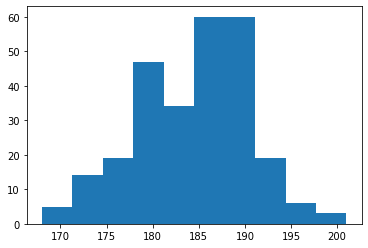

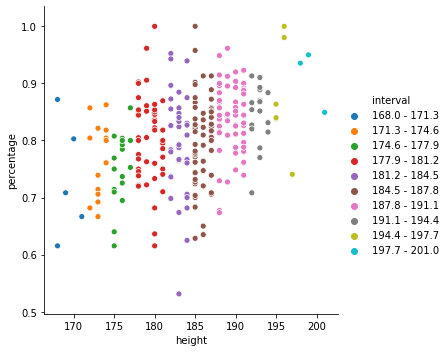

In [26]:
import seaborn as sns
tips = sns.load_dataset("tips")
hist = plt.hist(heightVspercentage["height"])[1] # intervals are created with histogram bin sizes
hist =hist.astype("float64")

category=[]
category_name =[]
for i in range(len(heightVspercentage)):
    for j in range(1,len(hist)):
        if heightVspercentage.iloc[i,0]<=hist[j]:
            category.append(j)
            category_name.append(str(hist[j-1]) +" - "+str(hist[j]))
            break
heightVspercentage["interval"]=category_name
heightVspercentage["category"]=category
sns.relplot(x="height", y="percentage",hue="interval", data=heightVspercentage)


# [RQ6] Experience and Winning in the Premier League

In this exercise we'll try to see if there is any relation between the average ages of the lineup of a Premier League team and his position in the Premier League table. In other word we'll try to prove that a team with more experienced players can have an advantage over teams with younger players.

In [28]:
%reset
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.linear_model import LinearRegression

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Obtain a matches dataframe and clean it

In [29]:
#Load teams.json and save it as json and as dataframe
#We clean and rename the teams dataframe because we want to easily join it with another dataframe.
teams = pd.read_json(r'C:\Users\simo2\teams.json')
with open(r'C:\Users\simo2\teams.json') as data_file:    
    data = json.load(data_file)
teams = pd.io.json.json_normalize(data) 
teams = teams[teams.type =="club"] # we don't want national teams
teams = teams[["name", "area.name", "wyId"]]
teams.rename(columns={"area.name":'area','wyId':'currentTeamId'},inplace = True)
teams = teams[(teams['area'] == 'England') | (teams['area'] == 'Wales')]
teams

,name,area,currentTeamId
0,Newcastle United,England,1613
8,Huddersfield Town,England,1673
19,Swansea City,Wales,10531
26,AFC Bournemouth,England,1659
27,Brighton & Hove Albion,England,1651
39,Burnley,England,1646
54,Leicester City,England,1631
55,West Ham United,England,1633
56,Stoke City,England,1639
60,Watford,England,1644


## Obtain a players dataframe and clean it

In [30]:
#Load players.json and save it as a dataframe.
#Clean the dataframe,defining a function that converts birthDate to age and apply to the birthDate column of players dataset

players = pd.read_json(r'C:\Users\simo2\Downloads\players.json')
players = players[['birthDate','currentTeamId','shortName','wyId']]
def convert_age(s):
    age =(pd.to_datetime('today').year-pd.to_datetime(s).year)
    return age
players['birthDate'] = players['birthDate'].apply(convert_age)
players.rename(columns={'birthDate': 'age'}, inplace=True)
players

,age,currentTeamId,shortName,wyId
0,30,4502,H. Tekin,32777
1,20,3775,M. Sarr,393228
2,21,3772,O. Mandanda,393230
3,29,683,A. N'Diaye,32793
4,20,2975,I. Konat\u00e9,393247
5,30,676,J. Cillessen,33
6,30,1624,T. Alderweireld,36
7,32,1624,J. Vertonghen,48
8,25,3783,A. Djiku,229427
9,27,1624,C. Eriksen,54


## Merging the two dataframes

In [31]:
#Merge players and teams dataframes and clean it
mergedDataframe = (pd.merge(players, teams, on='currentTeamId'))
mergedDataframe_players = mergedDataframe[['age','name','wyId','shortName']]
mergedDataframe_players

,age,name,wyId,shortName
0,30,Tottenham Hotspur,36,T. Alderweireld
1,32,Tottenham Hotspur,48,J. Vertonghen
2,27,Tottenham Hotspur,54,C. Eriksen
3,29,Tottenham Hotspur,8292,D. Rose
4,26,Tottenham Hotspur,8717,H. Kane
5,29,Tottenham Hotspur,8945,K. Trippier
6,32,Tottenham Hotspur,11152,M. Demb\u00e9l\u00e9
7,25,Tottenham Hotspur,210044,E. Dier
8,23,Tottenham Hotspur,13484,D. Alli
9,27,Tottenham Hotspur,14911,Son Heung-Min


## Creating a new dataframe with the appearances of each player

We want to determine the average age of the lineups of each team. So we decided to rank all the players of each team by their lineup appearances and to take into consideration only the ages of the eleven players for each team that have the highest number of appearances.


In [32]:
#Load the matches.json dataset and create a dictionary of players.Each player has as a value the times in which he was in the lineup during the Season
#Convert the dictionary to dataframe and merge it to the mergedDataframe_players
#Sort the new Dataframe by the Age keeping costant the teams

with open(r'C:\Users\simo2\OneDrive\Desktop\matches_England.json') as json_data:
    json_matches = json.load(json_data)
dictionary_of_players={}    
for i in range(len(json_matches)):
    list_keys=[*(json_matches[i]['teamsData'])]
    for key in list_keys:
        for j in range(11):
            Player=json_matches[i]['teamsData'][key]['formation']['lineup'][j]['playerId']
            
            if Player not in dictionary_of_players:
                dictionary_of_players[Player]=1
            else:   
                dictionary_of_players[Player]+=1 
Players_lineup = pd.DataFrame(dictionary_of_players.items(), columns=['wyId', 'Values'])
New_dataframe = (pd.merge(mergedDataframe_players,Players_lineup,on = 'wyId'))          

New_dataframe =New_dataframe.sort_values(by=['name','Values'],ascending=[True, False])
New_dataframe.rename(columns={"Values":'Appearances'},inplace = True)
New_dataframe

,age,name,wyId,shortName,Appearances
352,32,AFC Bournemouth,8726,A. Begovi\u0107,38
362,24,AFC Bournemouth,134102,N. Ak\u00e9,37
355,33,AFC Bournemouth,9285,C. Daniels,34
354,34,AFC Bournemouth,9279,S. Francis,31
360,28,AFC Bournemouth,9277,S. Cook,31
359,27,AFC Bournemouth,9637,J. King,27
366,22,AFC Bournemouth,302518,L. Cook,25
358,27,AFC Bournemouth,11669,C. Wilson,23
361,25,AFC Bournemouth,62224,R. Fraser,23
357,28,AFC Bournemouth,8460,A. Smith,22


## Create a dictionary which stores the average lineup ages of all the premier league teams using the dataframe with the appearances¶

In [33]:
#Reset the index and clean the dataframe
#Calculate the average age of all Premier League teams using a dictionary
New_dataframe = New_dataframe.reset_index ()
del New_dataframe['index']
dic_avg_age_teams = {}
total = 0
count = 0

try:
    for i in range(len(New_dataframe)):
        if New_dataframe['name'][i] == New_dataframe['name'][i+1] and New_dataframe['name'][i] not in dic_avg_age_teams:
            total += New_dataframe['age'][i]
            count += 1
        if New_dataframe['name'][i] != New_dataframe['name'][i+1] and New_dataframe['name'][i] not in dic_avg_age_teams:
            total += New_dataframe['age'][i]
            count += 1
        
        if count == 11 and New_dataframe['name'][i] not in dic_avg_age_teams:
            dic_avg_age_teams[New_dataframe['name'][i]]= total/11
            total = 0
            count = 0
except KeyError:
    pass      
dic_avg_age_teams

{'AFC Bournemouth': 27.636363636363637,
 'Arsenal': 29.0,
 'Brighton & Hove Albion': 29.90909090909091,
 'Burnley': 29.727272727272727,
 'Chelsea': 28.09090909090909,
 'Crystal Palace': 29.09090909090909,
 'Everton': 27.545454545454547,
 'Huddersfield Town': 28.545454545454547,
 'Leicester City': 30.09090909090909,
 'Liverpool': 27.363636363636363,
 'Manchester City': 28.90909090909091,
 'Manchester United': 29.636363636363637,
 'Newcastle United': 28.181818181818183,
 'Southampton': 27.09090909090909,
 'Stoke City': 30.272727272727273,
 'Swansea City': 28.90909090909091,
 'Tottenham Hotspur': 27.545454545454547,
 'Watford': 31.181818181818183,
 'West Bromwich Albion': 29.818181818181817,
 'West Ham United': 30.272727272727273}

## Calculating the Premier League final table with a dictionary

In [35]:
#Load matches.json as a dataframe,clean it and create a dictionary that pairs each team with their points in Premier League season 2017-2018

matches = pd.read_json(r"C:\Users\simo2\OneDrive\Desktop\matches_England.json")
matches = matches[["status", "gameweek", "winner", "label" ]] 
matches = matches[matches.status =="Played"] 
del matches["status"] 
matches = matches.sort_values(by=["gameweek"]) 
matches.index = range(len(matches.index)) 
teams = teams.reset_index ()
del teams['index']
dict_of_teams = {}
for i in range(len(teams)):
    team = teams.iloc[i,0]
    wyId = teams.iloc[i,2]
    dict_of_teams[team]  = 0
    for i in range(len(matches)):
        if team in matches['label'][i] and matches['winner'][i]== wyId:
            dict_of_teams[team] += 3
        if team in matches['label'][i] and matches['winner'][i]== 0:
            dict_of_teams[team] += 1
dict_of_teams      

{'Newcastle United': 44,
 'Huddersfield Town': 37,
 'Swansea City': 33,
 'AFC Bournemouth': 44,
 'Brighton & Hove Albion': 41,
 'Burnley': 54,
 'Leicester City': 47,
 'West Ham United': 42,
 'Stoke City': 33,
 'Watford': 39,
 'Everton': 48,
 'West Bromwich Albion': 31,
 'Manchester City': 100,
 'Tottenham Hotspur': 77,
 'Crystal Palace': 44,
 'Southampton': 36,
 'Liverpool': 75,
 'Chelsea': 70,
 'Manchester United': 81,
 'Arsenal': 63}

## Obtaining a final dataframe from the two dictionaries

In [36]:
#Convert the two dictionaries to two dataframes and merge them

dataframe_avg_age= pd.DataFrame(dic_avg_age_teams.items(), columns=['name', 'avgage'])
dataframe_points = pd.DataFrame(dict_of_teams.items(), columns=['name', 'points'])
dataframe_points = dataframe_points.sort_values('name') 
merged_dataframe_points_avg_age= pd.merge(dataframe_avg_age,dataframe_points,on = 'name') 
merged_dataframe_points_avg_age

,name,avgage,points
0,AFC Bournemouth,27.636364,44
1,Arsenal,29.000000,63
2,Brighton & Hove Albion,29.909091,41
3,Burnley,29.727273,54
4,Chelsea,28.090909,70
5,Crystal Palace,29.090909,44
6,Everton,27.545455,48
7,Huddersfield Town,28.545455,37
8,Leicester City,30.090909,47
9,Liverpool,27.363636,75


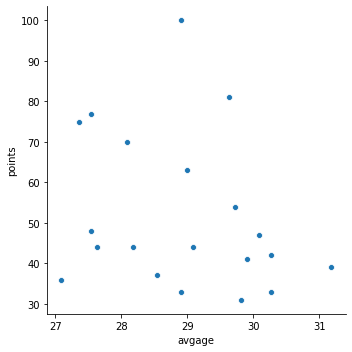

In [37]:
#Plot the dataframe

sns.relplot(x="avgage", y="points", data=merged_dataframe_points_avg_age)

We see no relation between the average ages of players of a team and the point that the team gained in the season.

## Linear regression

In [38]:
X = merged_dataframe_points_avg_age['avgage'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merged_dataframe_points_avg_age['points'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

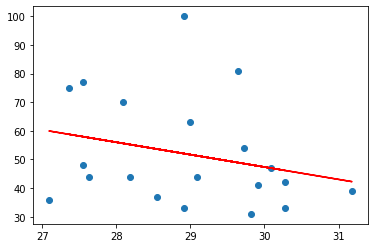

In [39]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

# CRQ1

In [85]:
%reset
import pandas as pd
import math

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## only shots and free kicks can generate a goal

In [86]:
events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_England.json')

# taking only free kicks and shots events
events_england = events_england.loc[events_england['eventName'].isin(['Shot','Free Kick'])]
events_england = events_england.loc[events_england['subEventName'].isin(['Free kick shot','Penalty', 'Shot'])]
events_england = events_england.reset_index(drop=True)

In [87]:
# creating a new column 'status' which says if the event is a goal or not
d = {'id': 101}

l_tags = events_england['tags']
status = []

for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no goal')
    else:
        status.append('goal')

events_england['status'] = status # add the column

del events_england['tags']

## only goals

In [88]:
events_england = events_england.loc[events_england['status'] == 'goal']
events_england = events_england.reset_index(drop=True)

In [89]:
# creating a new column called 'period':
# period --> tranforming the continuous variable 'secEvent' in a discrete variable 'period' (period of the mathc ex: [0, 9)

In [90]:
period = []
event_sec = events_england['eventSec']
match_period = events_england['matchPeriod']

for i in range(len(event_sec)):
    
    if match_period[i] == '1H':
        
        if event_sec[i] < 540:
            period.append('0-9')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('9-18')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('18-27')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('27-36')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('36-45')
        elif event_sec[i] >= 2700:
            period.append('45+')
        
    if match_period[i] == '2H':
        
        if event_sec[i] < 540:
            period.append('45-54')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('54-63')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('63-72')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('72-81')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('81-90')
        elif event_sec[i] >= 2700:
            period.append('90+')
            
 # adding the column
events_england['period'] = period

events_england = events_england.reset_index(drop=True)
events_england

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,status,period
0,10,Shot,94.595788,177959212,2499719,1H,25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,0-9
1,10,Shot,254.745027,177959280,2499719,1H,14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",100,Shot,1631,goal,0-9
2,10,Shot,1710.855093,177959759,2499719,1H,12829,"[{'y': 54, 'x': 94}, {'y': 100, 'x': 100}]",100,Shot,1631,goal,27-36
3,10,Shot,2815.900791,177960130,2499719,1H,7945,"[{'y': 50, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,45+
4,10,Shot,634.312236,177960379,2499719,2H,12829,"[{'y': 54, 'x': 92}, {'y': 100, 'x': 100}]",100,Shot,1631,goal,54-63
5,10,Shot,2231.119656,177960849,2499719,2H,7870,"[{'y': 63, 'x': 94}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,81-90
6,10,Shot,2374.620655,177960902,2499719,2H,26010,"[{'y': 44, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,1609,goal,81-90
7,10,Shot,1455.304065,178148575,2499720,2H,8325,"[{'y': 55, 'x': 89}, {'y': 100, 'x': 100}]",100,Shot,1625,goal,63-72
8,10,Shot,1394.017200,178122511,2499721,1H,9127,"[{'y': 52, 'x': 87}, {'y': 100, 'x': 100}]",100,Shot,1646,goal,18-27
9,10,Shot,2318.473517,178122911,2499721,1H,8433,"[{'y': 24, 'x': 91}, {'y': 100, 'x': 100}]",100,Shot,1646,goal,36-45


## barplot with the absolute frequency of goals in all the time slots

In [91]:
import matplotlib.pyplot as plt
import numpy as np

periods = ['0-9', '9-18', '18-27', '27-36', '36-45', '45+', '45-54', '54-63', '63-72', '72-81', '81-90', '90+']
frequency = []

for i in periods:
    num = events_england[events_england['period'] == i]
    frequency.append(len(num))

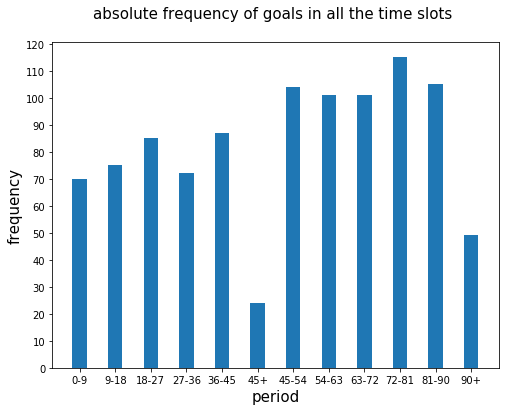

In [92]:
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.figure(figsize=(8,6))

plt.bar(x, frequency)   
plt.xticks(x, periods)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.title('absolute frequency of goals in all the time slots \n', fontsize=15)
plt.xlabel('period', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.show()

## find the top 10 teams that score the most in the interval "81-90"

In [93]:
# taking only the events in the '81-90' period

last_min = events_england[events_england['period'] == '81-90']
last_min = last_min.reset_index(drop=True)

In [94]:
# only premier league's teams

teams = pd.read_json(r'C:\Users\simo2\teams.json')

for i in range(len(teams)):

    if teams.loc[i, 'type'] != 'club':  # not national
        teams = teams.drop(i)

    elif teams.loc[i, 'area']['name'] != 'England' and teams.loc[i, 'area']['name'] != 'Wales': # swansea is in wales
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)

## dict with key = team and value = number of gol in '81-90' period¶

In [95]:
team_lastmin = {} # dict

for i in range(len(teams)):
    count = last_min[last_min['teamId'] == teams.loc[i, 'wyId']] # every goal in 81-90 period of one team
    team_lastmin[teams.loc[i, 'name']] = len(count)   # number of goal of that team

In [96]:
team_lastmin = sorted(team_lastmin.items(), key=lambda x: x[1], reverse=True) #sort the dict by values

team_lastmin[0:10] # top 10 teams that score the most in the interval "81-90"

[('Manchester City', 13),
 ('Arsenal', 11),
 ('Chelsea', 9),
 ('Manchester United', 9),
 ('Watford', 7),
 ('Crystal Palace', 7),
 ('Liverpool', 7),
 ('West Ham United', 6),
 ('AFC Bournemouth', 5),
 ('Tottenham Hotspur', 5)]

## show if there are players that were able to score at least one goal in 8 different intervals¶

In [97]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')

# take only the premier league's player
teamsId = list(teams['wyId'])

for i in range(len(players)):
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)

In [98]:
players_eight_period = [] # list with players that were able to score at least one goal in different intervals

for i in range(len(players)):
    count = 0
    player_goal = events_england[events_england['playerId'] == players.loc[i, 'wyId']] # all goal of a player
    
    if '0-9' in list(player_goal['period']):
        count += 1
    if '9-18' in list(player_goal['period']):
        count += 1
    if '18-27' in list(player_goal['period']):
        count += 1
    if '27-36' in list(player_goal['period']):
        count += 1
    if '36-45' in list(player_goal['period']):
        count += 1
    if 'E1' in list(player_goal['period']):
        count += 1
    if '45-54' in list(player_goal['period']):
        count += 1
    if '54-63' in list(player_goal['period']):
        count += 1
    if '63-72' in list(player_goal['period']):
        count += 1
    if '72-81' in list(player_goal['period']):
        count += 1
    if '81-90' in list(player_goal['period']):
        count += 1
    if 'E2' in list(player_goal['period']):
        count += 1
    # at least 8 different periods    
    if count >= 8:
        players_eight_period.append(players.loc[i, 'shortName'])

players_eight_period

['R. Lukaku',
 'H. Kane',
 'R. Sterling',
 'J. Vardy',
 'Mohamed Salah',
 '\\u00c1lvaro Morata']

# LIGA

In [73]:
import pandas as pd
import math

events_england = pd.read_json(R'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_Spain.json')

# taking only free kicks and shots events
events_england = events_england.loc[events_england['eventName'].isin(['Shot','Free Kick'])]
events_england = events_england.loc[events_england['subEventName'].isin(['Free kick shot','Penalty', 'Shot'])]
events_england = events_england.reset_index(drop=True)

# creating a new column 'status' which says if the event is a goal or not
d = {'id': 101}

l_tags = events_england['tags']
status = []

for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no goal')
    else:
        status.append('goal')

events_england['status'] = status # add the column

del events_england['tags']

events_england = events_england.loc[events_england['status'] == 'goal']
events_england = events_england.reset_index(drop=True)

period = []
event_sec = events_england['eventSec']
match_period = events_england['matchPeriod']

for i in range(len(event_sec)):
    
    if match_period[i] == '1H':
        
        if event_sec[i] < 540:
            period.append('0-9')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('9-18')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('18-27')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('27-36')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('36-45')
        elif event_sec[i] >= 2700:
            period.append('45+')
        
    if match_period[i] == '2H':
        
        if event_sec[i] < 540:
            period.append('45-54')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('54-63')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('63-72')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('72-81')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('81-90')
        elif event_sec[i] >= 2700:
            period.append('90+')
            
 # adding the column
events_england['period'] = period

events_england = events_england.reset_index(drop=True)
events_england



,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,status,period
0,3,Free Kick,2571.818575,180866021,2565548,2H,225089,"[{'y': 50, 'x': 89}, {'y': 31, 'x': 95}]",35,Penalty,695,goal,81-90
1,10,Shot,1300.582823,180054901,2565549,1H,395636,"[{'y': 60, 'x': 96}, {'y': 0, 'x': 0}]",100,Shot,692,goal,18-27
2,10,Shot,1934.155903,180055162,2565549,1H,355599,"[{'y': 24, 'x': 72}, {'y': 100, 'x': 100}]",100,Shot,687,goal,27-36
3,10,Shot,289.398873,180055441,2565549,2H,395636,"[{'y': 37, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,692,goal,45-54
4,10,Shot,2083.919638,180055988,2565549,2H,3576,"[{'y': 40, 'x': 90}, {'y': 100, 'x': 100}]",100,Shot,687,goal,72-81
5,3,Free Kick,2530.698092,180056062,2565549,2H,40770,"[{'y': 50, 'x': 89}, {'y': 76, 'x': 89}]",35,Penalty,687,goal,81-90
6,10,Shot,1310.794203,180136736,2565551,1H,3714,"[{'y': 56, 'x': 93}, {'y': 0, 'x': 0}]",100,Shot,756,goal,18-27
7,10,Shot,1476.013591,180089919,2565551,1H,3714,"[{'y': 43, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,756,goal,18-27
8,10,Shot,1952.101011,180090787,2565551,2H,254408,"[{'y': 61, 'x': 78}, {'y': 100, 'x': 100}]",100,Shot,679,goal,72-81
9,10,Shot,2348.948934,180090885,2565551,2H,227894,"[{'y': 44, 'x': 90}, {'y': 100, 'x': 100}]",100,Shot,679,goal,81-90


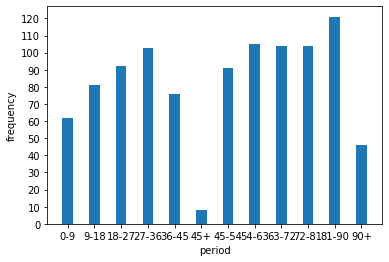

In [74]:
import matplotlib.pyplot as plt
import numpy as np

periods = ['0-9', '9-18', '18-27', '27-36', '36-45', '45+', '45-54', '54-63', '63-72', '72-81', '81-90', '90+']
frequency = []

for i in periods:
    num = events_england[events_england['period'] == i]
    frequency.append(len(num))
    
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.bar(x, frequency)   
plt.xticks(x, periods)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.xlabel('period')
plt.ylabel('frequency')
plt.show()

In [75]:
# taking only the events in the '81-90' period

last_min = events_england[events_england['period'] == '81-90']
last_min = last_min.reset_index(drop=True)

# only premier league's teams

teams = pd.read_json(R'C:\Users\simo2\teams.json')

for i in range(len(teams)):

    if teams.loc[i, 'type'] != 'club':  # not national
        teams = teams.drop(i)

    elif teams.loc[i, 'area']['name'] != 'Spain':
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)


team_lastmin = {} # dict

for i in range(len(teams)):
    count = last_min[last_min['teamId'] == teams.loc[i, 'wyId']] # every goal in 81-90 period of one team
    team_lastmin[teams.loc[i, 'name']] = len(count)   # number of goal of that team
    
    
team_lastmin = sorted(team_lastmin.items(), key=lambda x: x[1], reverse=True) #sort the dict by values

team_lastmin[0:10] # top 10 teams that score the most in the interval "81-90"

[('Barcelona', 19),
 ('Real Madrid', 13),
 ('Real Sociedad', 10),
 ('Valencia', 9),
 ('Real Betis', 7),
 ('Sevilla', 7),
 ('Levante', 6),
 ('Getafe', 6),
 ('Las Palmas', 6),
 ('Espanyol', 5)]

In [76]:
players = pd.read_json(R'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')

# take only the premier league's player
teamsId = list(teams['wyId'])

for i in range(len(players)):
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)

In [77]:
players_eight_period = [] # list with players that were able to score at least one goal in different intervals

for i in range(len(players)):
    count = 0
    player_goal = events_england[events_england['playerId'] == players.loc[i, 'wyId']] # all goal of a player
    
    if '0-9' in list(player_goal['period']):
        count += 1
    if '9-18' in list(player_goal['period']):
        count += 1
    if '18-27' in list(player_goal['period']):
        count += 1
    if '27-36' in list(player_goal['period']):
        count += 1
    if '36-45' in list(player_goal['period']):
        count += 1
    if 'E1' in list(player_goal['period']):
        count += 1
    if '45-54' in list(player_goal['period']):
        count += 1
    if '54-63' in list(player_goal['period']):
        count += 1
    if '63-72' in list(player_goal['period']):
        count += 1
    if '72-81' in list(player_goal['period']):
        count += 1
    if '81-90' in list(player_goal['period']):
        count += 1
    if 'E2' in list(player_goal['period']):
        count += 1
    # at least 8 different periods    
    if count >= 8:
        players_eight_period.append(players.loc[i, 'shortName'])

players_eight_period


['Maxi G\\u00f3mez',
 'L. Messi',
 'A. Griezmann',
 'C. Stuani',
 'C. Bacca',
 'Gerard Moreno',
 'L. Su\\u00e1rez',
 'Willian Jos\\u00e9',
 'G. Bale',
 'Mikel Oyarzabal']

# BUNDESLIGA

In [99]:
import pandas as pd
import math

events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_Germany.json')

# taking only free kicks and shots events
events_england = events_england.loc[events_england['eventName'].isin(['Shot','Free Kick'])]
events_england = events_england.loc[events_england['subEventName'].isin(['Free kick shot','Penalty', 'Shot'])]
events_england = events_england.reset_index(drop=True)

In [100]:
# creating a new column 'status' which says if the event is a goal or not
d = {'id': 101}

l_tags = events_england['tags']
status = []

for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no goal')
    else:
        status.append('goal')

events_england['status'] = status # add the column

del events_england['tags']

In [101]:
events_england = events_england.loc[events_england['status'] == 'goal']
events_england = events_england.reset_index(drop=True)

In [102]:
period = []
event_sec = events_england['eventSec']
match_period = events_england['matchPeriod']

for i in range(len(event_sec)):
    
    if match_period[i] == '1H':
        
        if event_sec[i] < 540:
            period.append('0-9')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('9-18')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('18-27')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('27-36')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('36-45')
        elif event_sec[i] >= 2700:
            period.append('45+')
        
    if match_period[i] == '2H':
        
        if event_sec[i] < 540:
            period.append('45-54')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('54-63')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('63-72')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('72-81')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('81-90')
        elif event_sec[i] >= 2700:
            period.append('90+')
            
 # adding the column
events_england['period'] = period

events_england = events_england.reset_index(drop=True)
events_england

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,status,period
0,10,Shot,529.393731,179896639,2516739,1H,134383,"[{'y': 59, 'x': 95}, {'y': 0, 'x': 0}]",100,Shot,2444,goal,0-9
1,10,Shot,1078.302328,179896833,2516739,1H,209091,"[{'y': 53, 'x': 98}, {'y': 0, 'x': 0}]",100,Shot,2444,goal,9-18
2,3,Free Kick,421.309818,179897463,2516739,2H,14817,"[{'y': 50, 'x': 89}, {'y': 39, 'x': 89}]",35,Penalty,2444,goal,45-54
3,10,Shot,1161.062618,179897673,2516739,2H,105619,"[{'y': 71, 'x': 91}, {'y': 100, 'x': 100}]",100,Shot,2446,goal,63-72
4,10,Shot,2325.296611,180021286,2516740,2H,69411,"[{'y': 43, 'x': 77}, {'y': 0, 'x': 0}]",100,Shot,2482,goal,81-90
5,10,Shot,30.694360,180030800,2516741,2H,15020,"[{'y': 74, 'x': 89}, {'y': 0, 'x': 0}]",100,Shot,2457,goal,45-54
6,10,Shot,985.741060,180031151,2516741,2H,15020,"[{'y': 38, 'x': 91}, {'y': 0, 'x': 0}]",100,Shot,2457,goal,54-63
7,10,Shot,193.963316,180431159,2516743,2H,236528,"[{'y': 58, 'x': 92}, {'y': 0, 'x': 0}]",100,Shot,2454,goal,45-54
8,3,Free Kick,2581.449202,180057378,2516744,1H,144766,"[{'y': 51, 'x': 90}, {'y': 63, 'x': 89}]",35,Penalty,2449,goal,36-45
9,10,Shot,1636.079140,180057878,2516744,2H,105378,"[{'y': 30, 'x': 90}, {'y': 0, 'x': 0}]",100,Shot,2449,goal,72-81


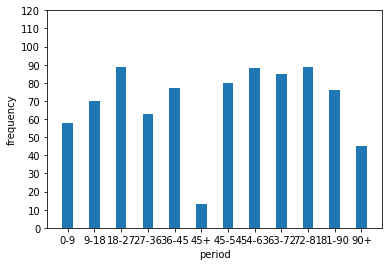

In [103]:
import matplotlib.pyplot as plt
import numpy as np

periods = ['0-9', '9-18', '18-27', '27-36', '36-45', '45+', '45-54', '54-63', '63-72', '72-81', '81-90', '90+']
frequency = []

for i in periods:
    num = events_england[events_england['period'] == i]
    frequency.append(len(num))
    
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.bar(x, frequency)   
plt.xticks(x, periods)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.xlabel('period')
plt.ylabel('frequency')
plt.show()

In [105]:
# taking only the events in the '81-90' period

last_min = events_england[events_england['period'] == '81-90']
last_min = last_min.reset_index(drop=True)

# only premier league's teams

teams = pd.read_json(r'C:\Users\simo2\teams.json')

for i in range(len(teams)):

    if teams.loc[i, 'type'] != 'club':  # not national
        teams = teams.drop(i)

    elif teams.loc[i, 'area']['name'] != 'Germany':
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)


team_lastmin = {} # dict

for i in range(len(teams)):
    count = last_min[last_min['teamId'] == teams.loc[i, 'wyId']] # every goal in 81-90 period of one team
    team_lastmin[teams.loc[i, 'name']] = len(count)   # number of goal of that team
    
    
team_lastmin = sorted(team_lastmin.items(), key=lambda x: x[1], reverse=True) #sort the dict by values

team_lastmin[0:10] # top 10 teams that score the most in the interval "81-90"

[('Bayern M\\u00fcnchen', 10),
 ('Schalke 04', 6),
 ('Hannover 96', 6),
 ('Hoffenheim', 6),
 ('K\\u00f6ln', 5),
 ('RB Leipzig', 5),
 ('Bayer Leverkusen', 4),
 ('Borussia Dortmund', 4),
 ('Hertha BSC', 4),
 ('Freiburg', 4)]

In [106]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')

# take only the premier league's player
teamsId = list(teams['wyId'])

for i in range(len(players)):
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)

In [107]:
players_eight_period = [] # list with players that were able to score at least one goal in different intervals

for i in range(len(players)):
    count = 0
    player_goal = events_england[events_england['playerId'] == players.loc[i, 'wyId']] # all goal of a player
    
    if '0-9' in list(player_goal['period']):
        count += 1
    if '9-18' in list(player_goal['period']):
        count += 1
    if '18-27' in list(player_goal['period']):
        count += 1
    if '27-36' in list(player_goal['period']):
        count += 1
    if '36-45' in list(player_goal['period']):
        count += 1
    if 'E1' in list(player_goal['period']):
        count += 1
    if '45-54' in list(player_goal['period']):
        count += 1
    if '54-63' in list(player_goal['period']):
        count += 1
    if '63-72' in list(player_goal['period']):
        count += 1
    if '72-81' in list(player_goal['period']):
        count += 1
    if '81-90' in list(player_goal['period']):
        count += 1
    if 'E2' in list(player_goal['period']):
        count += 1
    # at least 8 different periods    
    if count >= 8:
        players_eight_period.append(players.loc[i, 'shortName'])

players_eight_period

['A. Kramari\\u0107',
 'T. M\\u00fcller',
 'R. Lewandowski',
 'S. Wagner',
 'M. Uth',
 'M. Gregoritsch']

## SERIE A

In [108]:
import pandas as pd
import math

events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_Italy.json')

# taking only free kicks and shots events
events_england = events_england.loc[events_england['eventName'].isin(['Shot','Free Kick'])]
events_england = events_england.loc[events_england['subEventName'].isin(['Free kick shot','Penalty', 'Shot'])]
events_england = events_england.reset_index(drop=True)

In [109]:
# creating a new column 'status' which says if the event is a goal or not
d = {'id': 101}

l_tags = events_england['tags']
status = []

for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no goal')
    else:
        status.append('goal')

events_england['status'] = status # add the column

del events_england['tags']

In [110]:
events_england = events_england.loc[events_england['status'] == 'goal']
events_england = events_england.reset_index(drop=True)

In [111]:
period = []
event_sec = events_england['eventSec']
match_period = events_england['matchPeriod']

for i in range(len(event_sec)):
    
    if match_period[i] == '1H':
        
        if event_sec[i] < 540:
            period.append('0-9')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('9-18')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('18-27')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('27-36')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('36-45')
        elif event_sec[i] >= 2700:
            period.append('45+')
        
    if match_period[i] == '2H':
        
        if event_sec[i] < 540:
            period.append('45-54')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('54-63')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('63-72')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('72-81')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('81-90')
        elif event_sec[i] >= 2700:
            period.append('90+')
            
 # adding the column
events_england['period'] = period

events_england = events_england.reset_index(drop=True)
events_england

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,status,period
0,3,Free Kick,1844.168147,180425722,2575959,1H,8306,"[{'y': 68, 'x': 79}, {'y': 100, 'x': 100}]",33,Free kick shot,3158,goal,27-36
1,10,Shot,1592.832659,180461275,2575960,1H,259292,"[{'y': 35, 'x': 89}, {'y': 0, 'x': 0}]",100,Shot,3166,goal,18-27
2,10,Shot,1979.741913,180461575,2575960,1H,20941,"[{'y': 54, 'x': 77}, {'y': 100, 'x': 100}]",100,Shot,3185,goal,27-36
3,3,Free Kick,307.866189,180456200,2575961,1H,285109,"[{'y': 49, 'x': 89}, {'y': 38, 'x': 88}]",35,Penalty,3157,goal,0-9
4,10,Shot,1058.642403,180456201,2575961,1H,351010,"[{'y': 53, 'x': 97}, {'y': 100, 'x': 100}]",100,Shot,3157,goal,9-18
5,10,Shot,1376.164822,180456202,2575961,1H,11063,"[{'y': 39, 'x': 91}, {'y': 100, 'x': 100}]",100,Shot,3157,goal,18-27
6,10,Shot,2307.667592,180075808,2575962,1H,99452,"[{'y': 65, 'x': 87}, {'y': 100, 'x': 100}]",100,Shot,3187,goal,36-45
7,10,Shot,996.570808,180076452,2575962,2H,25849,"[{'y': 37, 'x': 90}, {'y': 100, 'x': 100}]",100,Shot,3187,goal,54-63
8,3,Free Kick,2269.301855,180076595,2575962,2H,20536,"[{'y': 51, 'x': 90}, {'y': 34, 'x': 87}]",35,Penalty,3194,goal,81-90
9,3,Free Kick,299.845536,180458839,2575963,1H,206314,"[{'y': 49, 'x': 89}, {'y': 56, 'x': 87}]",35,Penalty,3161,goal,0-9


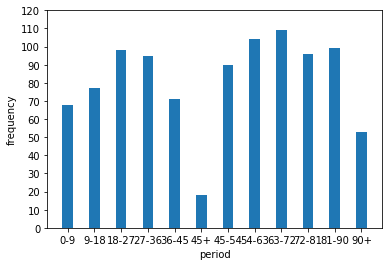

In [112]:
import matplotlib.pyplot as plt
import numpy as np

periods = ['0-9', '9-18', '18-27', '27-36', '36-45', '45+', '45-54', '54-63', '63-72', '72-81', '81-90', '90+']
frequency = []

for i in periods:
    num = events_england[events_england['period'] == i]
    frequency.append(len(num))
    
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.bar(x, frequency)   
plt.xticks(x, periods)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.xlabel('period')
plt.ylabel('frequency')
plt.show()

In [114]:
# taking only the events in the '81-90' period

last_min = events_england[events_england['period'] == '81-90']
last_min = last_min.reset_index(drop=True)

# only premier league's teams

teams = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\teams.json')

for i in range(len(teams)):

    if teams.loc[i, 'type'] != 'club':  # not national
        teams = teams.drop(i)

    elif teams.loc[i, 'area']['name'] != 'Italy':
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)


team_lastmin = {} # dict

for i in range(len(teams)):
    count = last_min[last_min['teamId'] == teams.loc[i, 'wyId']] # every goal in 81-90 period of one team
    team_lastmin[teams.loc[i, 'name']] = len(count)   # number of goal of that team
    
    
team_lastmin = sorted(team_lastmin.items(), key=lambda x: x[1], reverse=True) #sort the dict by values

team_lastmin[0:10] # top 10 teams that score the most in the interval "81-90"

[('Lazio', 12),
 ('Juventus', 9),
 ('Internazionale', 8),
 ('Napoli', 8),
 ('Sampdoria', 7),
 ('Torino', 7),
 ('SPAL', 5),
 ('Chievo', 5),
 ('Benevento', 5),
 ('Atalanta', 5)]

In [115]:
players = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\Project aris\players.json')

# take only the premier league's player
teamsId = list(teams['wyId'])

for i in range(len(players)):
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)

In [116]:
players_eight_period = [] # list with players that were able to score at least one goal in different intervals

for i in range(len(players)):
    count = 0
    player_goal = events_england[events_england['playerId'] == players.loc[i, 'wyId']] # all goal of a player
    
    if '0-9' in list(player_goal['period']):
        count += 1
    if '9-18' in list(player_goal['period']):
        count += 1
    if '18-27' in list(player_goal['period']):
        count += 1
    if '27-36' in list(player_goal['period']):
        count += 1
    if '36-45' in list(player_goal['period']):
        count += 1
    if 'E1' in list(player_goal['period']):
        count += 1
    if '45-54' in list(player_goal['period']):
        count += 1
    if '54-63' in list(player_goal['period']):
        count += 1
    if '63-72' in list(player_goal['period']):
        count += 1
    if '72-81' in list(player_goal['period']):
        count += 1
    if '81-90' in list(player_goal['period']):
        count += 1
    if 'E2' in list(player_goal['period']):
        count += 1
    # at least 8 different periods    
    if count >= 8:
        players_eight_period.append(players.loc[i, 'shortName'])

players_eight_period

['D. Mertens',
 'S. Milinkovi\\u0107-Savi\\u0107',
 'Iago Falqu\\u00e9',
 'E. D\\u017eeko',
 'M. Icardi',
 'F. Quagliarella',
 'M. Antenucci',
 'C. Immobile',
 'R. Inglese',
 'P. Dybala']

# LIGUE 1

In [117]:
import pandas as pd
import math

events_england = pd.read_json(r'C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_France.json')

# taking only free kicks and shots events
events_england = events_england.loc[events_england['eventName'].isin(['Shot','Free Kick'])]
events_england = events_england.loc[events_england['subEventName'].isin(['Free kick shot','Penalty', 'Shot'])]
events_england = events_england.reset_index(drop=True)

# creating a new column 'status' which says if the event is a goal or not
d = {'id': 101}

l_tags = events_england['tags']
status = []

for i in range(len(l_tags)):

    if d not in l_tags[i]:
        status.append('no goal')
    else:
        status.append('goal')

events_england['status'] = status # add the column

del events_england['tags']

events_england = events_england.loc[events_england['status'] == 'goal']
events_england = events_england.reset_index(drop=True)

period = []
event_sec = events_england['eventSec']
match_period = events_england['matchPeriod']

for i in range(len(event_sec)):
    
    if match_period[i] == '1H':
        
        if event_sec[i] < 540:
            period.append('0-9')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('9-18')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('18-27')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('27-36')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('36-45')
        elif event_sec[i] >= 2700:
            period.append('45+')
        
    if match_period[i] == '2H':
        
        if event_sec[i] < 540:
            period.append('45-54')
        elif event_sec[i] >= 540 and event_sec[i] < 1080:
            period.append('54-63')
        elif event_sec[i] >= 1080 and event_sec[i] < 1620:
            period.append('63-72')
        elif event_sec[i] >= 1620 and event_sec[i] < 2160:
            period.append('72-81')
        elif event_sec[i] >= 2160 and event_sec[i] < 2700:
            period.append('81-90')
        elif event_sec[i] >= 2700:
            period.append('90+')
            
 # adding the column
events_england['period'] = period

events_england = events_england.reset_index(drop=True)
events_england



,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,teamId,status,period
0,10,Shot,605.975493,176505350,2500686,1H,256992,"[{'y': 57, 'x': 94}, {'y': 0, 'x': 0}]",100,Shot,3799,goal,9-18
1,10,Shot,1568.104834,176505459,2500686,1H,26389,"[{'y': 43, 'x': 96}, {'y': 100, 'x': 100}]",100,Shot,3772,goal,18-27
2,10,Shot,410.542029,176506029,2500686,2H,274970,"[{'y': 51, 'x': 93}, {'y': 100, 'x': 100}]",100,Shot,3772,goal,45-54
3,10,Shot,2560.235393,176506707,2500686,2H,253784,"[{'y': 47, 'x': 93}, {'y': 0, 'x': 0}]",100,Shot,3799,goal,81-90
4,10,Shot,136.184670,176436550,2500687,2H,213308,"[{'y': 36, 'x': 80}, {'y': 0, 'x': 0}]",100,Shot,3776,goal,45-54
5,3,Free Kick,1320.610031,176436808,2500687,2H,25923,"[{'y': 51, 'x': 89}, {'y': 80, 'x': 95}]",35,Penalty,3776,goal,63-72
6,10,Shot,1464.996021,176436831,2500687,2H,286553,"[{'y': 63, 'x': 93}, {'y': 0, 'x': 0}]",100,Shot,3776,goal,63-72
7,10,Shot,1360.538512,176189687,2500688,1H,5167,"[{'y': 36, 'x': 80}, {'y': 0, 'x': 0}]",100,Shot,3766,goal,18-27
8,3,Free Kick,808.741059,176190137,2500688,2H,28115,"[{'y': 50, 'x': 90}, {'y': 71, 'x': 91}]",35,Penalty,3766,goal,54-63
9,10,Shot,921.203818,176190153,2500688,2H,5167,"[{'y': 50, 'x': 85}, {'y': 0, 'x': 0}]",100,Shot,3766,goal,54-63


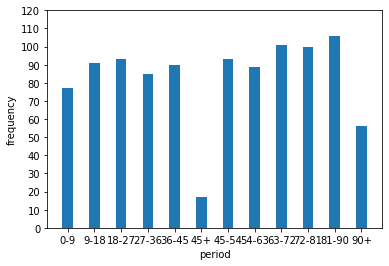

In [118]:
import matplotlib.pyplot as plt
import numpy as np

periods = ['0-9', '9-18', '18-27', '27-36', '36-45', '45+', '45-54', '54-63', '63-72', '72-81', '81-90', '90+']
frequency = []

for i in periods:
    num = events_england[events_england['period'] == i]
    frequency.append(len(num))
    
x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

plt.bar(x, frequency)   
plt.xticks(x, periods)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
plt.xlabel('period')
plt.ylabel('frequency')
plt.show()

In [120]:
# taking only the events in the '81-90' period

last_min = events_england[events_england['period'] == '81-90']
last_min = last_min.reset_index(drop=True)

# only premier league's teams

teams = pd.read_json(r'C:\Users\simo2\teams.json')

for i in range(len(teams)):

    if teams.loc[i, 'type'] != 'club':  # not national
        teams = teams.drop(i)

    elif teams.loc[i, 'area']['name'] != 'France' and teams.loc[i, 'area']['name'] != 'Monaco':
        teams = teams.drop(i)

teams = teams.reset_index(drop=True)


team_lastmin = {} # dict

for i in range(len(teams)):
    count = last_min[last_min['teamId'] == teams.loc[i, 'wyId']] # every goal in 81-90 period of one team
    team_lastmin[teams.loc[i, 'name']] = len(count)   # number of goal of that team
    
    
team_lastmin = sorted(team_lastmin.items(), key=lambda x: x[1], reverse=True) #sort the dict by values

team_lastmin[0:10] # top 10 teams that score the most in the interval "81-90"

[('PSG', 14),
 ('Rennes', 12),
 ('Olympique Lyonnais', 9),
 ('Olympique Marseille', 9),
 ('Caen', 6),
 ('Metz', 5),
 ('Lille', 5),
 ('Amiens SC', 5),
 ('Nice', 4),
 ('Strasbourg', 4)]

In [121]:
players = pd.read_json(r'C:\Users\simo2\ADM-HW2-GROUP-26\DataSet\players.json')

# take only the premier league's player
teamsId = list(teams['wyId'])

for i in range(len(players)):
    if players.loc[i, 'currentTeamId'] not in teamsId:
        players = players.drop(i)

players = players.reset_index(drop=True)

In [122]:
players_eight_period = [] # list with players that were able to score at least one goal in different intervals

for i in range(len(players)):
    count = 0
    player_goal = events_england[events_england['playerId'] == players.loc[i, 'wyId']] # all goal of a player
    
    if '0-9' in list(player_goal['period']):
        count += 1
    if '9-18' in list(player_goal['period']):
        count += 1
    if '18-27' in list(player_goal['period']):
        count += 1
    if '27-36' in list(player_goal['period']):
        count += 1
    if '36-45' in list(player_goal['period']):
        count += 1
    if 'E1' in list(player_goal['period']):
        count += 1
    if '45-54' in list(player_goal['period']):
        count += 1
    if '54-63' in list(player_goal['period']):
        count += 1
    if '63-72' in list(player_goal['period']):
        count += 1
    if '72-81' in list(player_goal['period']):
        count += 1
    if '81-90' in list(player_goal['period']):
        count += 1
    if 'E2' in list(player_goal['period']):
        count += 1
    # at least 8 different periods    
    if count >= 8:
        players_eight_period.append(players.loc[i, 'shortName'])

players_eight_period

['M. Depay',
 'R. Falcao',
 'Rony Lopes',
 'Mariano D\\u00edaz',
 'Malcom',
 'Neymar',
 'M. Balotelli',
 '\\u00c1. di Mar\\u00eda',
 'E. Cavani',
 'N. Roux',
 'F. Thauvin',
 'K. Toko Ekambi']

# CRQ2

## Imports and function for drawing the pitch

In [2]:
%reset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Import Data

In [3]:
matches = pd.read_json(r"C:\Users\simo2\OneDrive\Desktop\progettiaris\matches_Spain.json")
events = pd.read_json(r"C:\Users\simo2\OneDrive\Desktop\progettiaris\DataSet\events_Spain.json")
players = pd.read_json(r"C:\Users\simo2\ADM-HW2-GROUP-26\DataSet\players.json")
players = players.rename(columns={"wyId":"playerId"}) # change column name to later merge with events

Find the date of the match and merge players with events for the specific match between Barcelona and Real Madrid on 2018-05-06

In [4]:
BarcelonaVsMadrid = matches[matches["dateutc"].str.split(" ").str[0]=="2018-05-06"]
match_id =BarcelonaVsMadrid["wyId"][23]
events = events[events["matchId"] == match_id]
events_players = pd.merge(events, players, on='playerId', how='inner')
events_players

,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,...,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight
0,8,Pass,3.274992,249644096,2565907,1H,3321,"[{'y': 49, 'x': 50}, {'y': 40, 'x': 37}]",85,Simple pass,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
1,1,Duel,268.052669,249644143,2565907,1H,3321,"[{'y': 46, 'x': 52}, {'y': 51, 'x': 56}]",11,Ground attacking duel,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
2,8,Pass,269.899220,249644144,2565907,1H,3321,"[{'y': 51, 'x': 56}, {'y': 12, 'x': 93}]",86,Smart pass,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
3,8,Pass,305.039209,249644153,2565907,1H,3321,"[{'y': 30, 'x': 68}, {'y': 14, 'x': 61}]",85,Simple pass,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
4,8,Pass,392.198871,249644173,2565907,1H,3321,"[{'y': 4, 'x': 39}, {'y': 7, 'x': 35}]",85,Simple pass,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
5,8,Pass,411.351260,249644181,2565907,1H,3321,"[{'y': 37, 'x': 60}, {'y': 11, 'x': 77}]",85,Simple pass,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
6,7,Others on the ball,517.942531,249644210,2565907,1H,3321,"[{'y': 2, 'x': 61}, {'y': 8, 'x': 59}]",72,Touch,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
7,8,Pass,841.186307,249644267,2565907,1H,3321,"[{'y': 59, 'x': 97}, {'y': 51, 'x': 99}]",82,Head pass,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
8,8,Pass,1310.173709,249644303,2565907,1H,3321,"[{'y': 52, 'x': 24}, {'y': 41, 'x': 29}]",85,Simple pass,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81
9,7,Others on the ball,1315.374845,249644307,2565907,1H,3321,"[{'y': 9, 'x': 44}, {'y': 11, 'x': 55}]",72,Touch,...,675,Karim,right,185,Benzema,,"{'name': 'Algeria', 'id': '12', 'alpha3code': ...","{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...",K. Benzema,81


For the heatmap, we only need starting position of events. The function bellow retuns the x,y coordinates of to later put in the drawing function

In [5]:
def position_start_location(position):
    start = position[0]
    return [start["x"], start["y"]]

heatmap drawing function when start coordinates are given

In [7]:
def draw_heatmap(x_coord,y_coord, color="green"):
    ########## Plots#####################
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')

    #shades: give us the heat map we desire
    # n_levels: draw more lines, the larger n, the more bluerry it loos
    sns.kdeplot(x_coord, y_coord, shade = "True", color = color, n_levels = 30)
    plt.ylim(0, 80)  # need this, otherwise kde plot will go outside
    plt.xlim(0, 120)
    return plt.show()

# HEATMAP FOR RONALDO

fetch the necessary events for Ronaldo

In [8]:
ronaldo = events_players[events_players["firstName"]=="Cristiano Ronaldo"]
ronaldo_heatmap = ronaldo[(ronaldo["eventName"]=="Duel") | (ronaldo["eventName"]=="Pass") | (ronaldo["eventName"]=="Shot") |
                          (ronaldo["eventName"]=="Free Kick")]
x_coord_ronaldo = [i[0] for i in ronaldo_heatmap["positions"].apply(position_start_location)]
y_coord_ronaldo = [i[1] for i in ronaldo_heatmap["positions"].apply(position_start_location)]

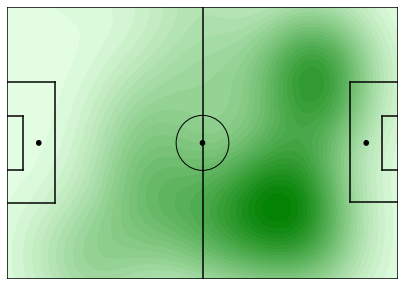

In [9]:
draw_heatmap(x_coord_ronaldo,y_coord_ronaldo)

# HEATMAP FOR MESSI

In [10]:
messi = events_players[events_players["shortName"]=="L. Messi"]
messi_heatmap = messi[(messi["eventName"]=="Duel") | (messi["eventName"]=="Pass") | (messi["eventName"]=="Shot") |
                          (messi["eventName"]=="Free Kick")]
x_coord_messi = [i[0] for i in messi_heatmap["positions"].apply(position_start_location)]
y_coord_messi = [i[1] for i in messi_heatmap["positions"].apply(position_start_location)]

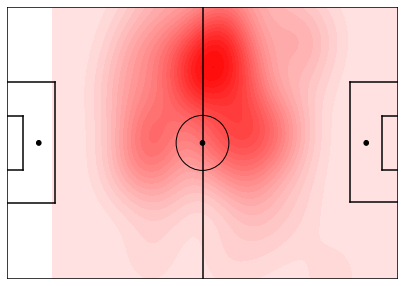

In [11]:
draw_heatmap(x_coord_messi,y_coord_messi, color="red")

## [CRQ2]Part 2 visualize with arrows the starting point and ending point of each pass done during the match by Jorginho and Miralem Pjanic

## Importing the dataset that we'll use for our research

In [12]:
#We import as json and as dataframes the datasets that we need
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Arc


matches = pd.read_json(r'C:\Users\simo2\Downloads\matches_Italy.json')
with open(r'C:\Users\simo2\Downloads\matches_Italy.json') as json_data:
    json_matches = json.load(json_data)
players = pd.read_json(r'C:\Users\simo2\Downloads\players(1).json')
with open(r'C:\Users\simo2\Downloads\players(1).json') as json_data:
    json_players = json.load(json_data)

with open(r'C:\Users\simo2\Downloads\events_Italy.json') as json_data:
    json_events = json.load(json_data) 
    
events = pd.read_json(r'C:\Users\simo2\Downloads\events_Italy.json')

## Dataframes of Jorginho and Pjanic

In [13]:
#We use the three datasets to obtain two new datasets tha contain only Jorginho's and Pjanic's passes
wyId_Jorginho = int(((players[players.shortName == 'Jorginho'].wyId).to_string()).split()[1])
wyId_Pjanic = int(((players[players.firstName == 'Miralem'].wyId).to_string()).split()[1])
match_wyId = int((((matches[matches.dateutc == '2018-04-22 18:45:00']).wyId).to_string()).split()[1])
events = events[events.matchId == match_wyId]
events_Jorginho = events[events.playerId == wyId_Jorginho]
events_Pjanic = events[events.playerId == wyId_Pjanic]
pass_Jorginho = (events_Jorginho[events_Jorginho.eventName == 'Pass']).reset_index()
pass_Pjanic = (events_Pjanic[events_Pjanic.eventName == 'Pass']).reset_index()
pass_Jorginho
pass_Pjanic

,index,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,573105,8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
1,573107,8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
2,573126,8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159
3,573220,8,Pass,352.941005,245487509,2576295,1H,20443,"[{'y': 26, 'x': 25}, {'y': 0, 'x': 31}]",85,Simple pass,"[{'id': 1401}, {'id': 1001}, {'id': 1802}]",3159
4,573225,8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159
5,573234,8,Pass,450.950633,245487528,2576295,1H,20443,"[{'y': 62, 'x': 21}, {'y': 82, 'x': 30}]",85,Simple pass,[{'id': 1801}],3159
6,573247,8,Pass,475.666889,245487536,2576295,1H,20443,"[{'y': 36, 'x': 17}, {'y': 22, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159
7,573256,8,Pass,499.263589,245487547,2576295,1H,20443,"[{'y': 7, 'x': 61}, {'y': 3, 'x': 71}]",85,Simple pass,[{'id': 1801}],3159
8,573258,8,Pass,504.436605,245487549,2576295,1H,20443,"[{'y': 5, 'x': 65}, {'y': 17, 'x': 65}]",85,Simple pass,[{'id': 1801}],3159
9,573267,8,Pass,518.646324,245487558,2576295,1H,20443,"[{'y': 44, 'x': 47}, {'y': 42, 'x': 51}]",85,Simple pass,[{'id': 1801}],3159


## Accurate passes of Jorginho and Pjanic

In [14]:
#We want to create also another two datasets that contains only the accurate passes of Jorginho and Pjanic
only_accurate_passes_J = pass_Jorginho.copy()
for i in range(len(only_accurate_passes_J)):
    for j in range(len(only_accurate_passes_J['tags'][i])):
        if only_accurate_passes_J['tags'][i][j]['id'] == 1802:
            only_accurate_passes_J.drop(i,inplace = True)
only_accurate_passes_P = pass_Pjanic.copy()
for i in range(len(only_accurate_passes_P)):
    for j in range(len(only_accurate_passes_P['tags'][i])):
        if only_accurate_passes_P['tags'][i][j]['id'] == 1802:
            only_accurate_passes_P.drop(i,inplace=True)
only_accurate_passes_J = only_accurate_passes_J.reset_index()
only_accurate_passes_P = only_accurate_passes_P.reset_index()
only_accurate_passes_P

,level_0,index,eventId,eventName,eventSec,id,matchId,matchPeriod,playerId,positions,subEventId,subEventName,tags,teamId
0,0,573105,8,Pass,26.160914,245487395,2576295,1H,20443,"[{'y': 55, 'x': 28}, {'y': 2, 'x': 39}]",85,Simple pass,[{'id': 1801}],3159
1,1,573107,8,Pass,33.120179,245487399,2576295,1H,20443,"[{'y': 30, 'x': 31}, {'y': 84, 'x': 31}]",83,High pass,[{'id': 1801}],3159
2,2,573126,8,Pass,120.169376,245487410,2576295,1H,20443,"[{'y': 62, 'x': 63}, {'y': 47, 'x': 63}]",85,Simple pass,"[{'id': 1401}, {'id': 1801}]",3159
3,4,573225,8,Pass,432.992312,245487518,2576295,1H,20443,"[{'y': 51, 'x': 26}, {'y': 76, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159
4,5,573234,8,Pass,450.950633,245487528,2576295,1H,20443,"[{'y': 62, 'x': 21}, {'y': 82, 'x': 30}]",85,Simple pass,[{'id': 1801}],3159
5,6,573247,8,Pass,475.666889,245487536,2576295,1H,20443,"[{'y': 36, 'x': 17}, {'y': 22, 'x': 13}]",85,Simple pass,[{'id': 1801}],3159
6,7,573256,8,Pass,499.263589,245487547,2576295,1H,20443,"[{'y': 7, 'x': 61}, {'y': 3, 'x': 71}]",85,Simple pass,[{'id': 1801}],3159
7,8,573258,8,Pass,504.436605,245487549,2576295,1H,20443,"[{'y': 5, 'x': 65}, {'y': 17, 'x': 65}]",85,Simple pass,[{'id': 1801}],3159
8,9,573267,8,Pass,518.646324,245487558,2576295,1H,20443,"[{'y': 44, 'x': 47}, {'y': 42, 'x': 51}]",85,Simple pass,[{'id': 1801}],3159
9,10,573268,8,Pass,521.329106,245487559,2576295,1H,20443,"[{'y': 42, 'x': 51}, {'y': 18, 'x': 41}]",85,Simple pass,[{'id': 1801}],3159


## Pitch function

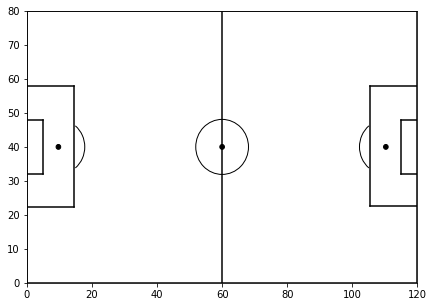

In [15]:
#We define a function tha draws a football pitch
def draw_pitch(ax):
    # size of the pitch is 120, 80
    #Create figure

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black")
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[0,80], color="black")

    #Left Penalty Area
    plt.plot([14.6,14.6],[57.8,22.2],color="black")
    plt.plot([0,14.6],[57.8,57.8],color="black")
    plt.plot([0,14.6],[22.2,22.2],color="black")

    #Right Penalty Area
    plt.plot([120,105.4],[57.8,57.8],color="black")
    plt.plot([105.4,105.4],[57.8,22.5],color="black")
    plt.plot([120, 105.4],[22.5,22.5],color="black")

    #Left 6-yard Box
    plt.plot([0,4.9],[48,48],color="black")
    plt.plot([4.9,4.9],[48,32],color="black")
    plt.plot([0,4.9],[32,32],color="black")

    #Right 6-yard Box
    plt.plot([120,115.1],[48,48],color="black")
    plt.plot([115.1,115.1],[48,32],color="black")
    plt.plot([120,115.1],[32,32],color="black")

    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    # arguments for arc
    # x, y coordinate of centerpoint of arc
    # width, height as arc might not be circle, but oval
    # angle: degree of rotation of the shape, anti-clockwise
    # theta1, theta2, start and end location of arc in degree
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
draw_pitch(ax)

## Jorginho's total and accurate passes

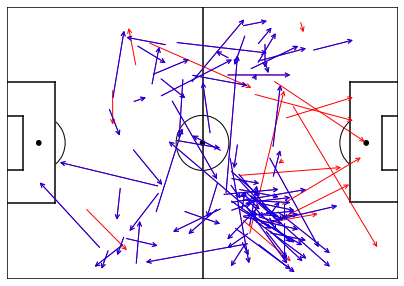

In [16]:
#We draw Passes of Jorginho.The non accurate passes are in red.
#We also adapt the coordinates to the pitch's size
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
draw_pitch(ax) 
plt.axis('off')
for i in range(len(pass_Jorginho)):
    
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = ((pass_Jorginho['positions'][i][1]['x'])*1.2, (pass_Jorginho['positions'][i][1]['y'])*0.8), xycoords = 'data',
               xytext = ((pass_Jorginho['positions'][i][0]['x'])*1.2, (pass_Jorginho['positions'][i][0]['y'])*0.8), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'red'),)
for i in range(len(only_accurate_passes_J)):
    
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = ((only_accurate_passes_J['positions'][i][1]['x'])*1.2, (only_accurate_passes_J['positions'][i][1]['y'])*0.8), xycoords = 'data',
               xytext = ((only_accurate_passes_J['positions'][i][0]['x'])*1.2, (only_accurate_passes_J['positions'][i][0]['y'])*0.8), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'blue'),)    
plt.show()

## Pjanic's total and accurate passes

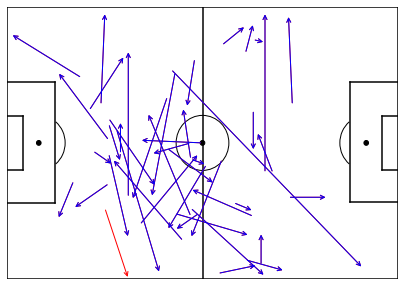

In [17]:
#We do the same for Pjanic
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)
ax.set_xlim([0,120])
ax.set_ylim([0,80])
draw_pitch(ax)
plt.axis('off')





for i in range(len(pass_Pjanic)):
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = ((pass_Pjanic['positions'][i][1]['x'])*1.2, (pass_Pjanic['positions'][i][1]['y'])*0.8), xycoords = 'data',
               xytext = ((pass_Pjanic['positions'][i][0]['x'])*1.2, (pass_Pjanic['positions'][i][0]['y'])*0.8), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'red'),)
for i in range(len(only_accurate_passes_P)):
    
    # annotate draw an arrow from a current position to pass_end_location
    ax.annotate("", xy = ((only_accurate_passes_P['positions'][i][1]['x'])*1.2, (only_accurate_passes_P['positions'][i][1]['y'])*0.8), xycoords = 'data',
               xytext = ((only_accurate_passes_P['positions'][i][0]['x'])*1.2, (only_accurate_passes_P['positions'][i][0]['y'])*0.8), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'blue'),)        






plt.show()

Between Jorginho and Pjanic we can see that the Jorginho's passes are more horizontal than Pjanic's passes. This could be the sign that it was a difficult match for Pjanic because in many occasions he was not able to move the ball towards the opponent's goal while Jorginho was better in this We also see that Jorginho tried more passes but that resulted in more inaccurate passes than Pjanic. There isn't really a difference between Pjanic total and accurate passes. While we can notice a difference between Jorginho's ones.